### ***Setup***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline 
from feature_engine.datetime import DatetimeFeatures  
from statsmodels.tsa.stattools import adfuller 
from utils import load_data, plot_mean_delay, plot_delay_with_outliers

Setup

In [2]:
filename = "./assets/generated/customized_data.csv"
filename_mean_encoded = "./assets/generated/result.csv"

Load Data

In [3]:
columns = ["Date_Time", "Delay"]
index_column = "Date_Time"
df_freq_H = load_data(filename, columns, index_column, "1H")
df_freq_D = load_data(filename, columns, index_column, "1D")
df_freq_M = load_data(filename, columns, index_column, "1M")
df_freq_Min = load_data(filename, columns, index_column, "1T")
df_mean_encoded = pd.read_csv(filename_mean_encoded)

## ***Analysis***

##### ***Setup***

***Reminder: Re-Run Load Data cell.***

In [4]:
columns = ["Date_Time", "Delay"]
index_column = "Date_Time"
df_freq_H = load_data(filename, columns, index_column, "1H")
df_freq_D = load_data(filename, columns, index_column, "1D")
df_freq_M = load_data(filename, columns, index_column, "1M")
df_freq_Min = load_data(filename, columns, index_column, "1T")
df_mean_encoded = pd.read_csv(filename_mean_encoded)

In [5]:
def apply_datetime_features(df):
    df_copy = df.copy()
    dtf = DatetimeFeatures(
        variables="index",
        features_to_extract=[
            "year",
            "month",
            "day_of_month",
            "hour",
            "weekend",
            "quarter",
        ],
    )
    pipeline = Pipeline([(f"adding time features", dtf)])
    df_copy = pipeline.fit_transform(df_copy)
    return df_copy

In [6]:
df_freq_H = apply_datetime_features(df_freq_H) 
df_freq_D = apply_datetime_features(df_freq_D)
df_freq_M = apply_datetime_features(df_freq_M)
df_freq_Min = apply_datetime_features(df_freq_Min)

In [7]:
df_freq_H

,Delay,year,month,day_of_month,hour,weekend,quarter
Date_Time,,,,,,,
2017-01-01 00:00:00,336,2017,1,1,0,1,1
2017-01-01 01:00:00,-19,2017,1,1,1,1,1
2017-01-01 02:00:00,-14,2017,1,1,2,1,1
2017-01-01 03:00:00,-18,2017,1,1,3,1,1
2017-01-01 04:00:00,-12,2017,1,1,4,1,1
...,...,...,...,...,...,...,...
2022-12-31 18:00:00,-2,2022,12,31,18,1,4
2022-12-31 19:00:00,-15,2022,12,31,19,1,4
2022-12-31 20:00:00,26,2022,12,31,20,1,4


### ***Data Exploration***

##### ***Mean Delay per Feature***

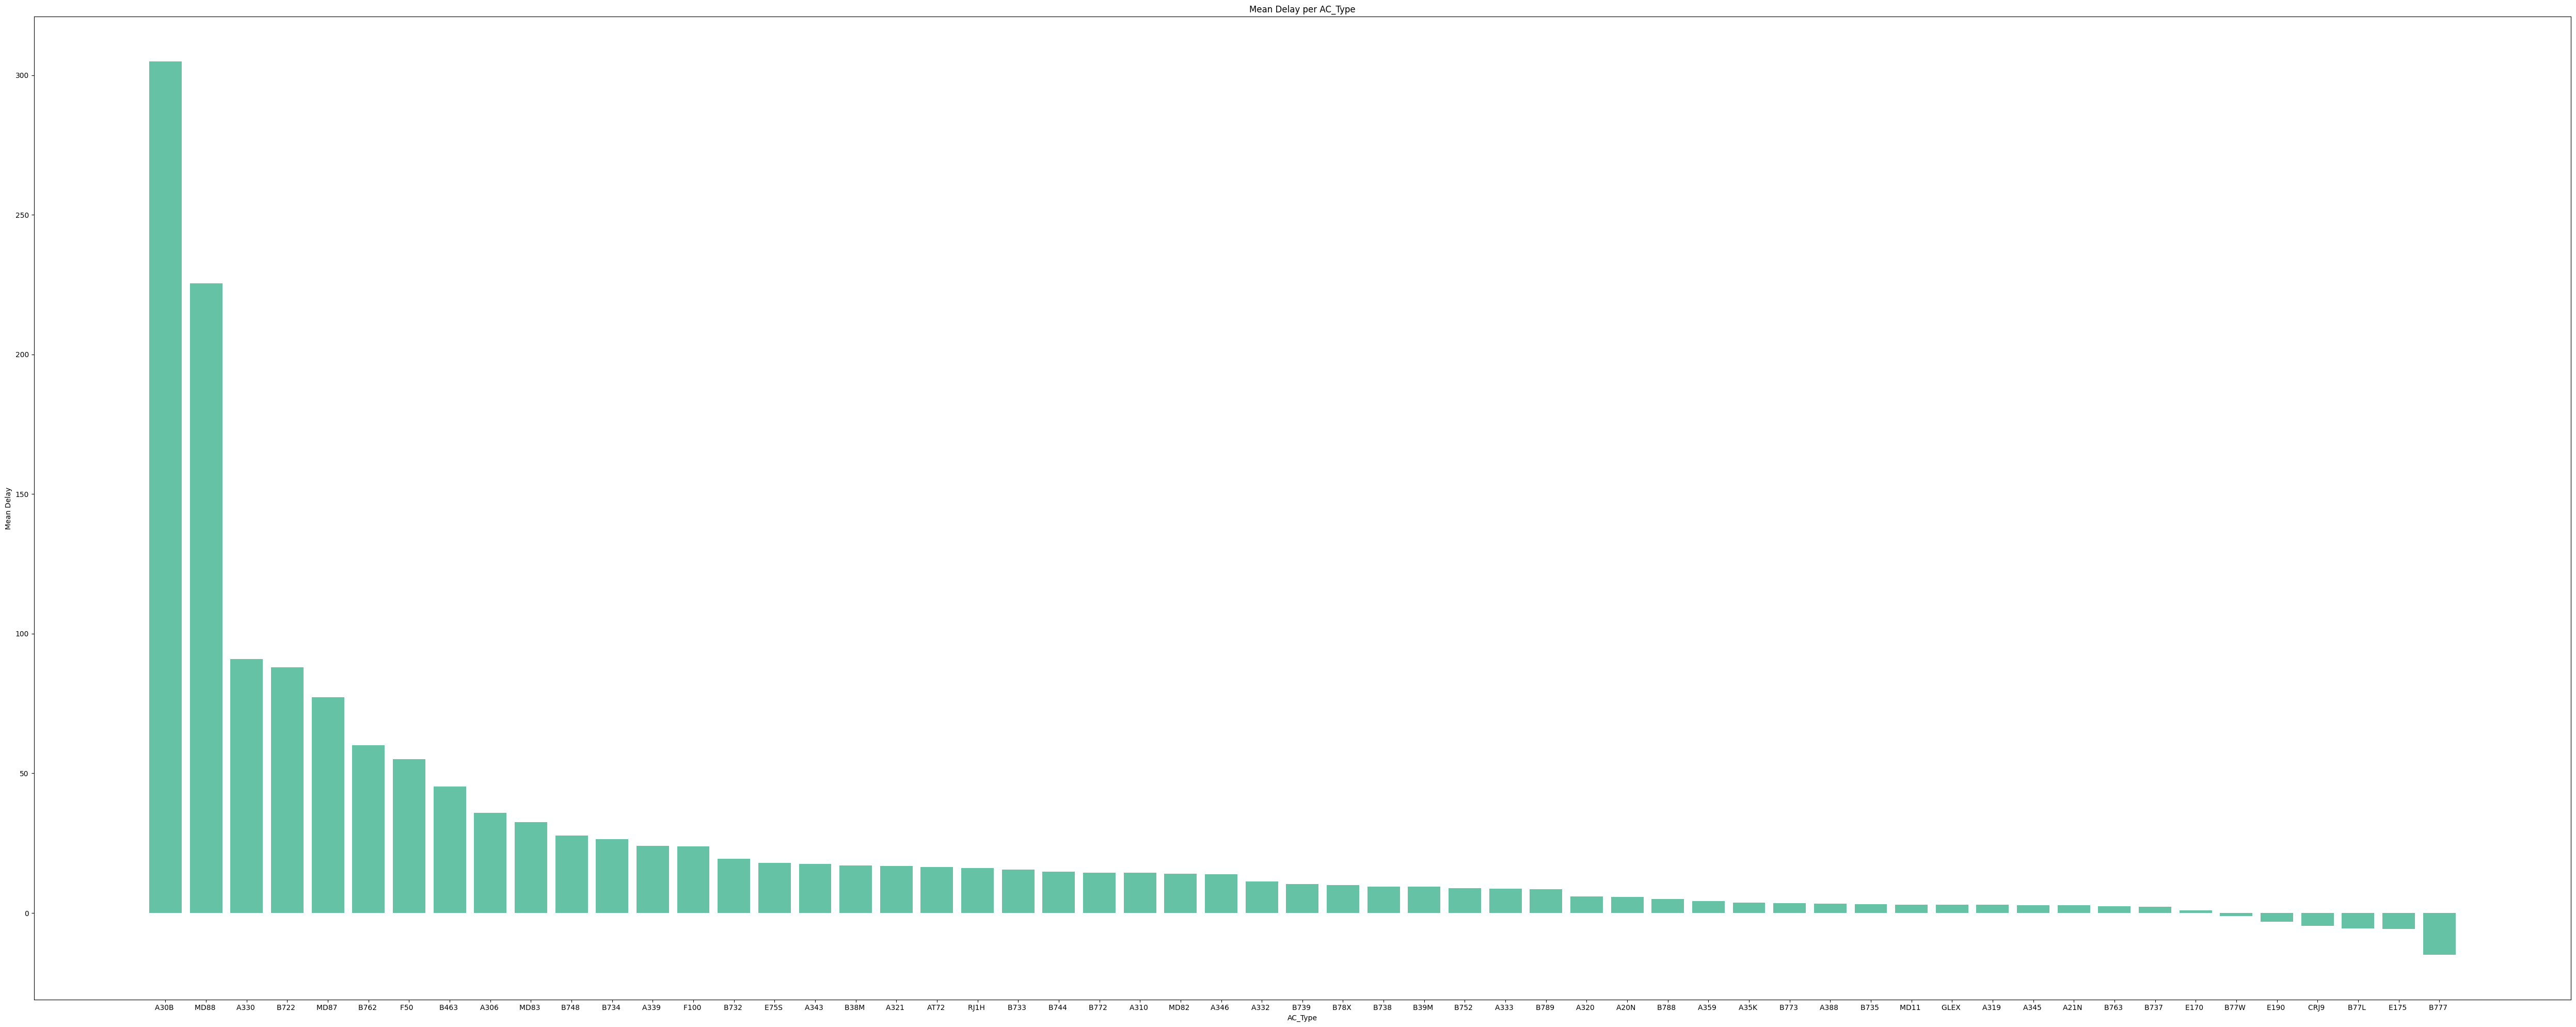

In [ ]:
colors = sns.color_palette("Set2")
plot_mean_delay(df_mean_encoded, 'AC_Type', 'Delay', colors[0], figsize=(50,20))

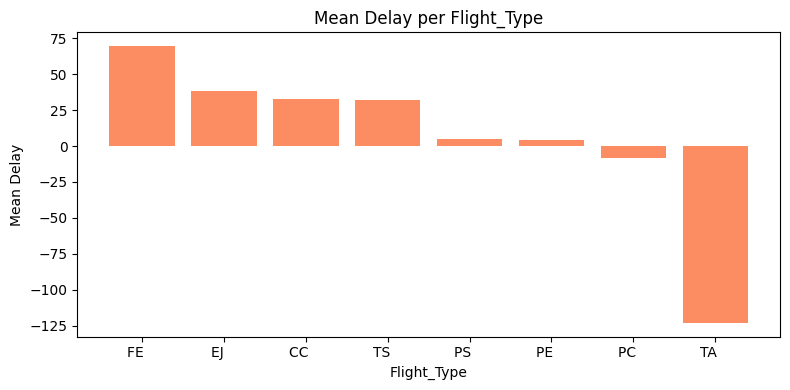

In [ ]:
plot_mean_delay(df_mean_encoded, 'Flight_Type', 'Delay', colors[1])

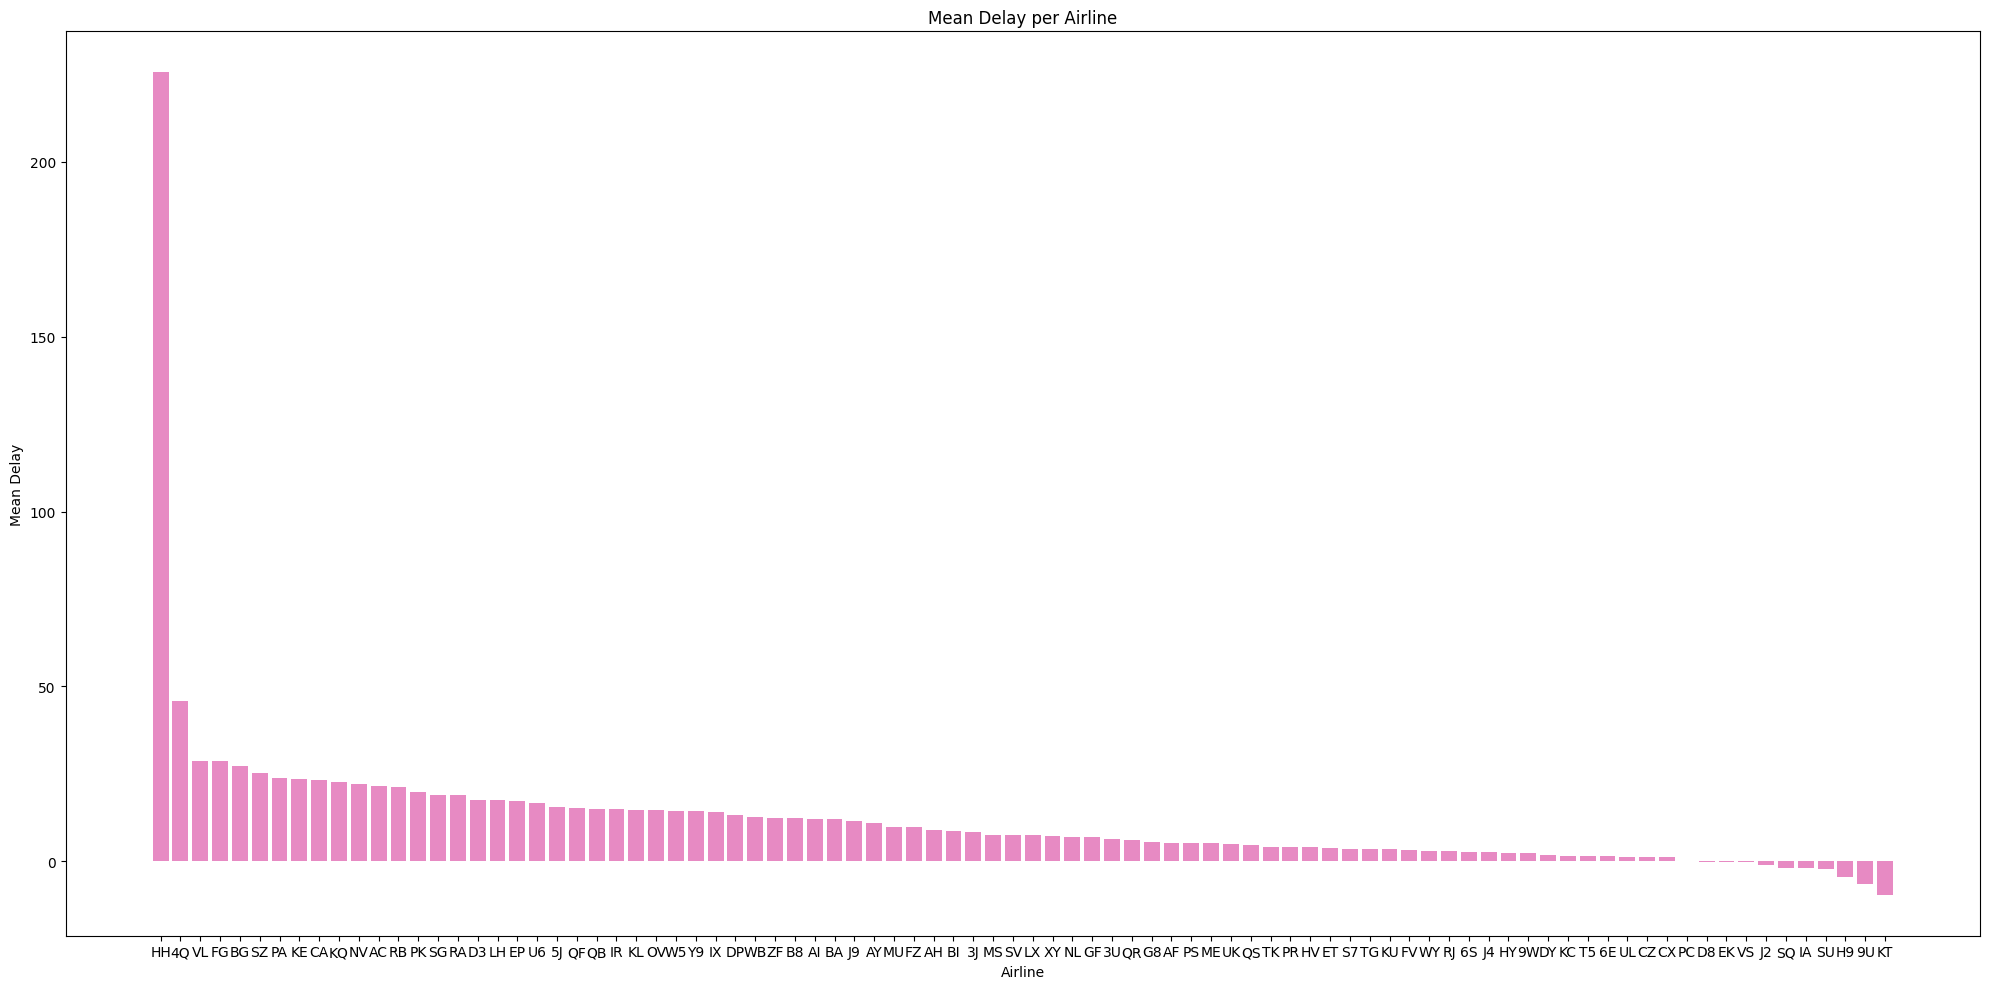

In [ ]:
plot_mean_delay(df_mean_encoded, 'Airline', 'Delay', colors[3], figsize=(20, 10))

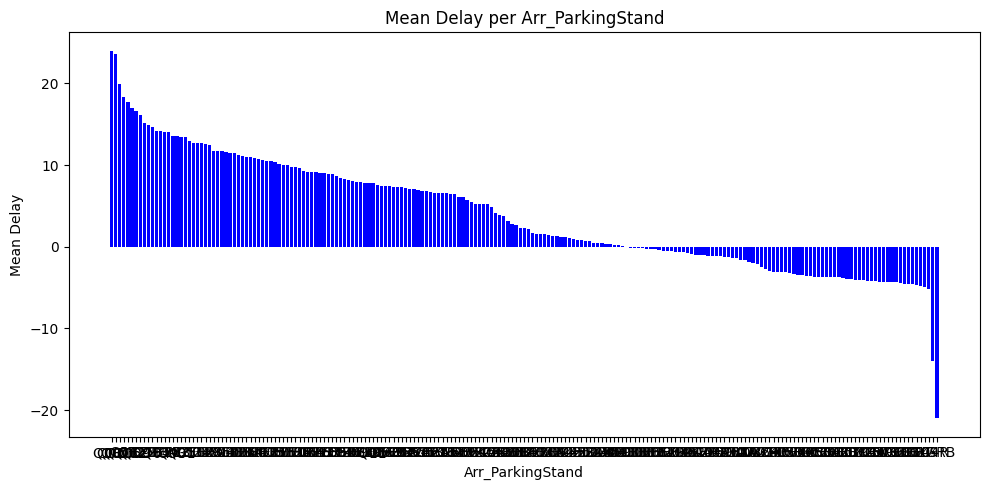

In [ ]:
plot_mean_delay(df_mean_encoded, 'Arr_ParkingStand', 'Delay', "blue", figsize=(10,5))

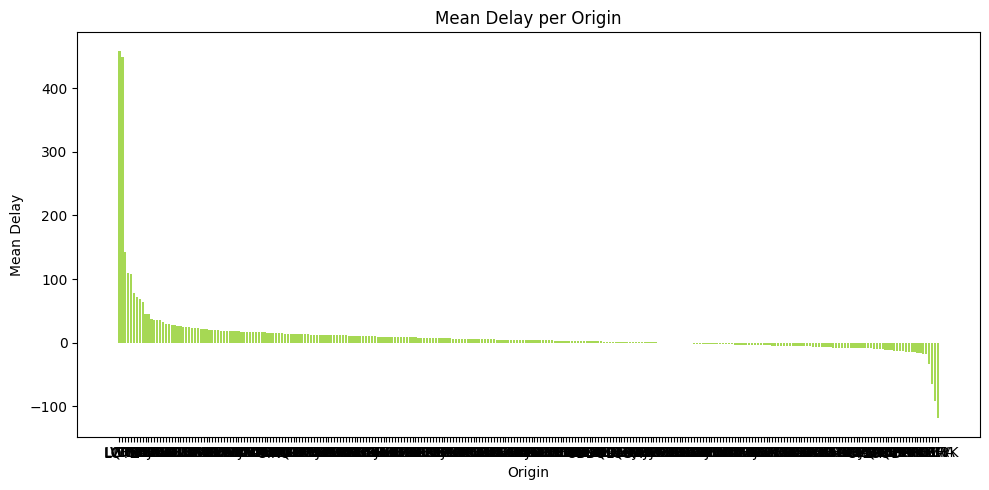

In [ ]:
plot_mean_delay(df_mean_encoded, 'Origin', 'Delay', colors[4], figsize=(10,5))

In [8]:
def plot_x_y_of_df(df, title, numeric_col_name="Delay", figsize=(12, 5)):
    df1 = df.loc[:, [numeric_col_name]]
    df1.plot(figsize=figsize)
    plt.ylabel(numeric_col_name)
    plt.legend().set_visible(False)
    plt.tight_layout()
    plt.title(title)
    sns.despine(top=True)
    plt.show()

##### ***General Analysis***

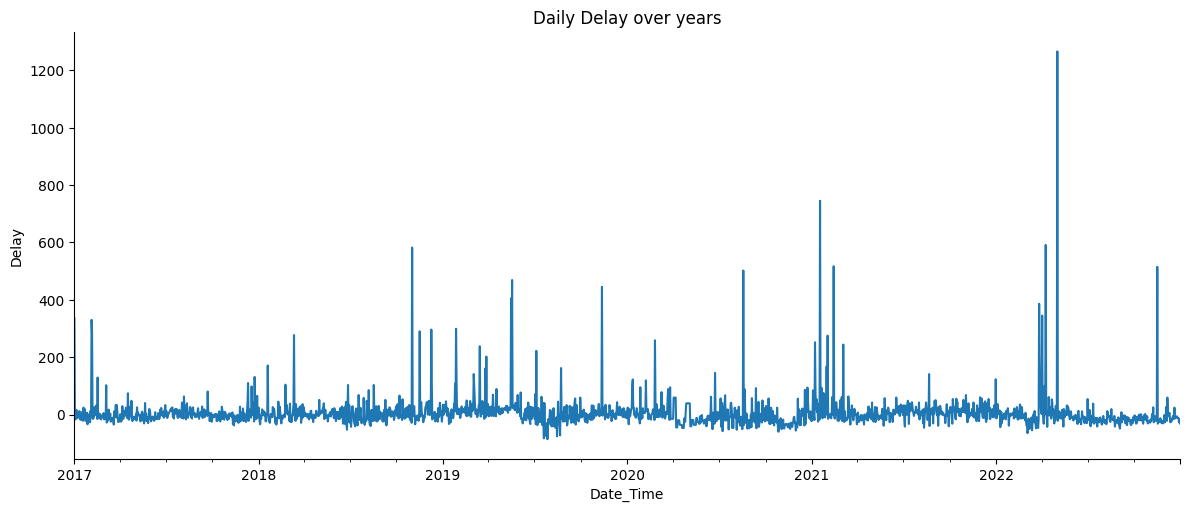

In [9]:
df = df_freq_D
plot_x_y_of_df(df, "Daily Delay over years", numeric_col_name="Delay", figsize=(12, 5))

Text(0, 0.5, 'Delay')

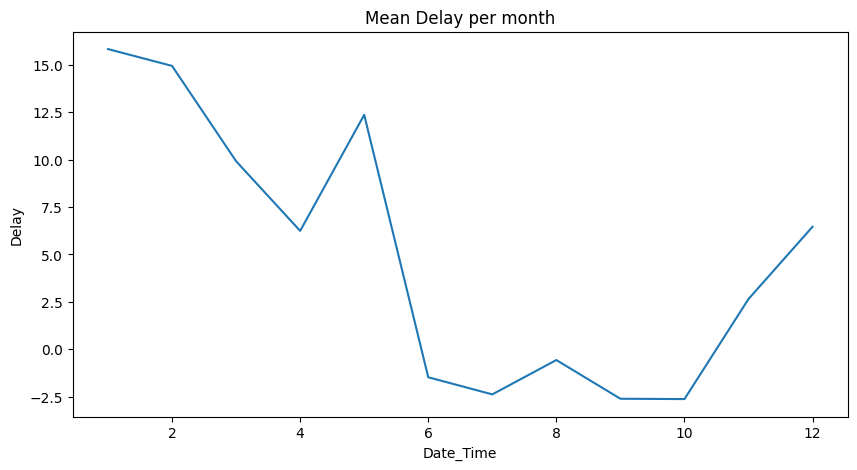

In [10]:
df = df_freq_D
month = df.index.month
df.groupby(month)["Delay"].mean().plot(figsize=(10, 5))
plt.title("Mean Delay per month")
plt.ylabel("Delay")


Text(0, 0.5, 'Delay')

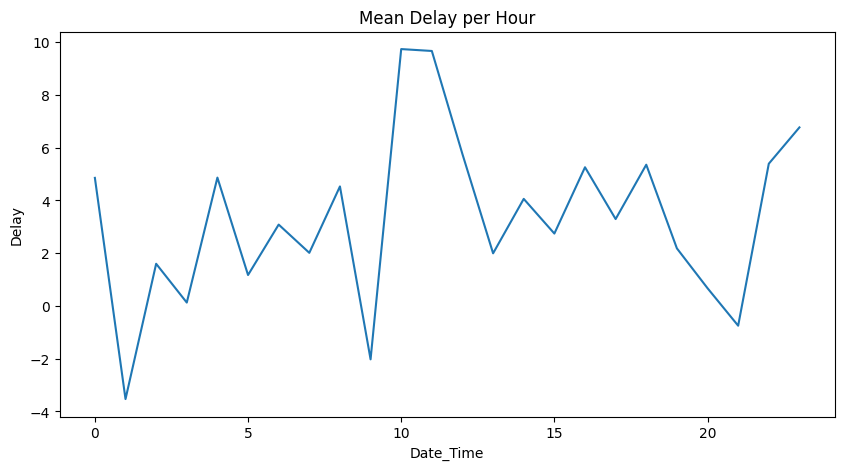

In [12]:
df = df_freq_H.copy()
hour = df.index.hour
df.groupby(hour)["Delay"].mean().plot(figsize=(10, 5))
plt.title("Mean Delay per Hour")
plt.ylabel("Delay")

Box Plot of Yearly Delay

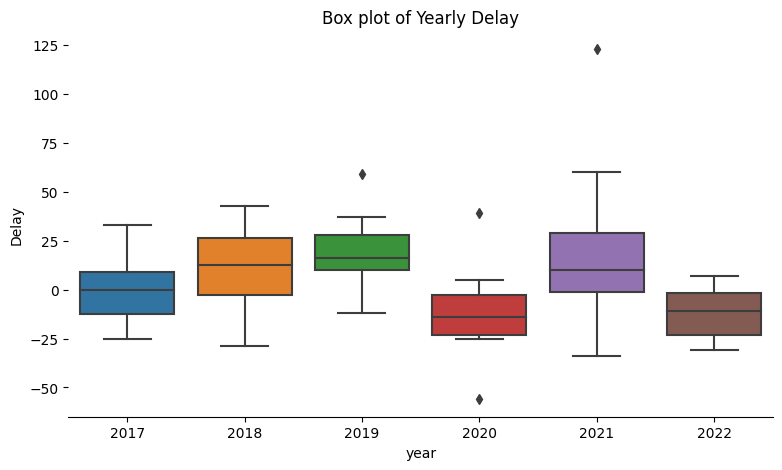

In [13]:
def plot_boxplot_indexed_df(df, x_column, y_column, figsize=(20, 5), title="Box Plot"):
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace=0.2)
    sns.boxplot(x=x_column, y=y_column, data=df)
    plt.xlabel(x_column)
    plt.title(title)
    sns.despine(left=True)
    plt.show()

plot_boxplot_indexed_df(df_freq_M.copy(), x_column="year", y_column="Delay", title="Box plot of Yearly Delay")

In [14]:
df_freq_H.describe()['Delay']

count    52583.000000
mean         3.281213
std         48.156672
min       -457.000000
25%        -15.000000
50%         -4.000000
75%         11.000000
max       2110.000000
Name: Delay, dtype: float64

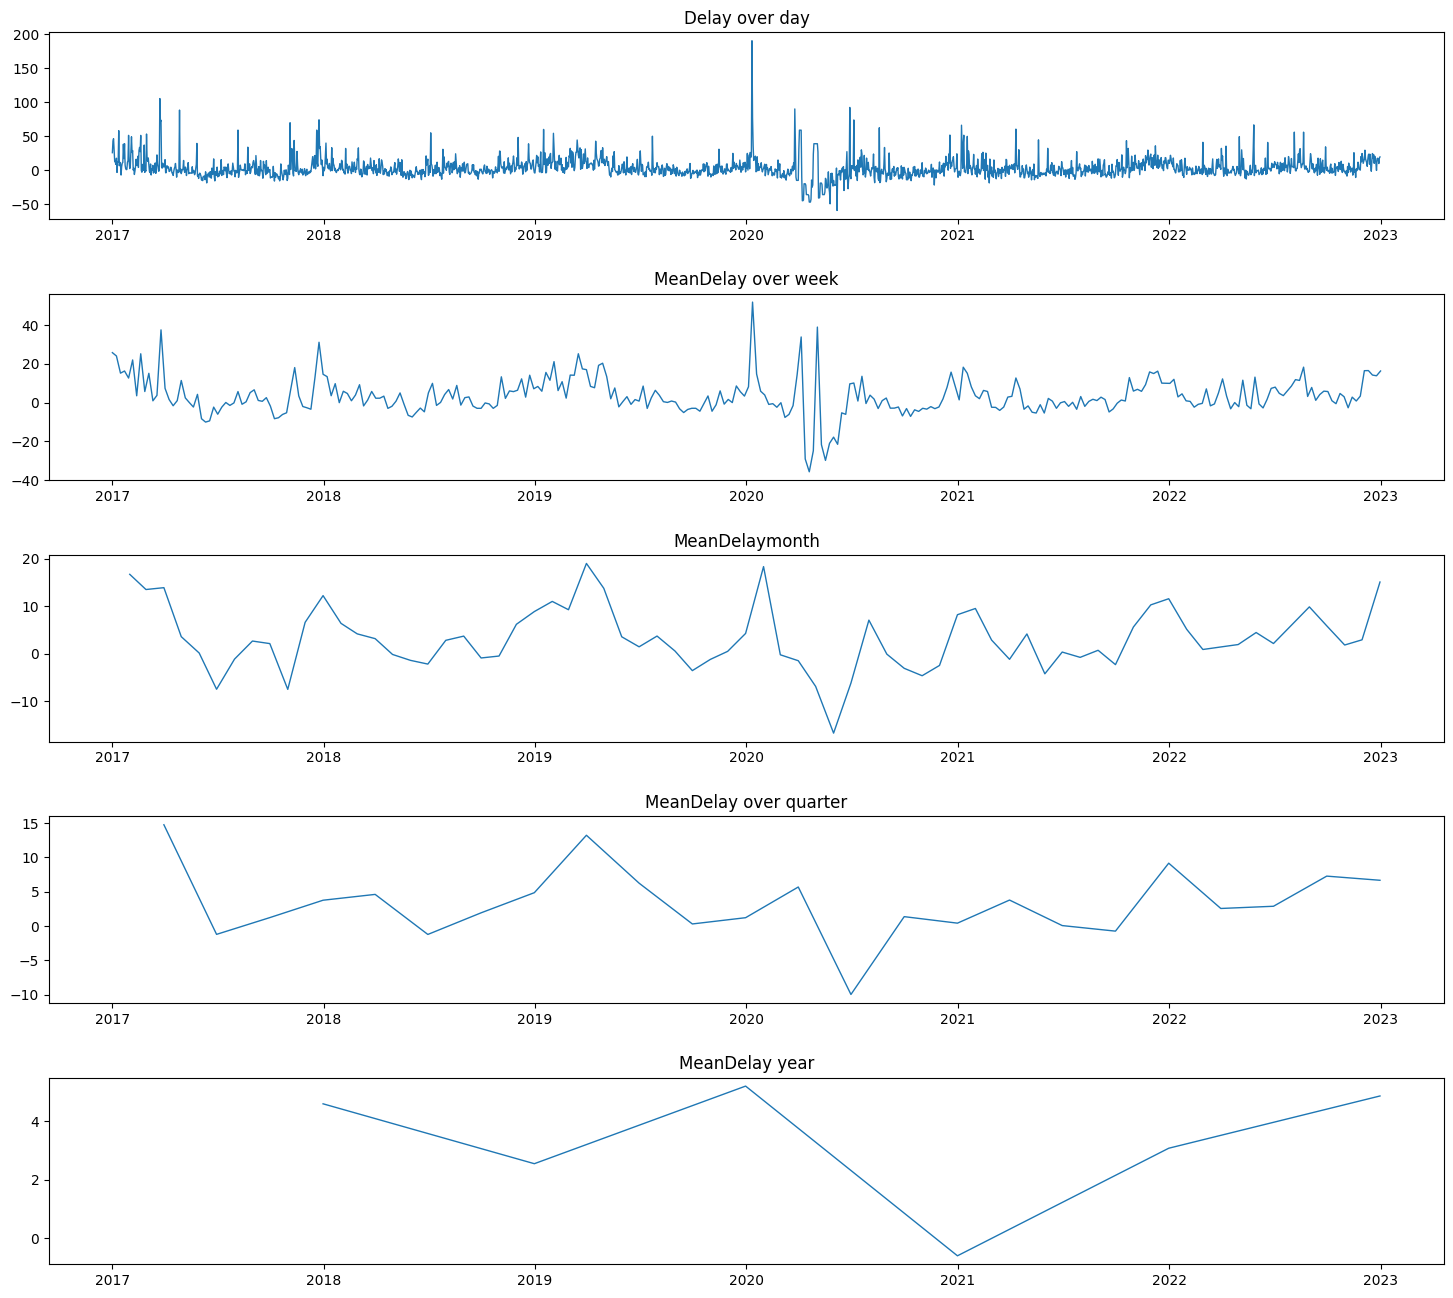

In [15]:
def plot_mean_delay_over_timestamp(indexed_df=df_freq_H, numeric_col_name="Delay"):
    df1 = indexed_df.copy()
    fig = plt.figure(figsize=(18, 16))
    fig.subplots_adjust(hspace=.4)
    ax1 = fig.add_subplot(5, 1, 1)
    ax1.plot(df1[numeric_col_name].resample('D').mean(), linewidth=1)
    ax1.set_title(numeric_col_name + ' over day')
    ax1.tick_params(axis='both', which='major')

    ax2 = fig.add_subplot(5, 1, 2, sharex=ax1)
    ax2.plot(df1[numeric_col_name].resample('W').mean(), linewidth=1)
    ax2.set_title('Mean' + numeric_col_name + ' over week')
    ax2.tick_params(axis='both', which='major')

    ax3 = fig.add_subplot(5, 1, 3, sharex=ax1)
    ax3.plot(df1[numeric_col_name].resample('M').mean(), linewidth=1)
    ax3.set_title('Mean' + numeric_col_name + 'month')
    ax3.tick_params(axis='both', which='major')

    ax4 = fig.add_subplot(5, 1, 4, sharex=ax1)
    ax4.plot(df1[numeric_col_name].resample('Q').mean(), linewidth=1)
    ax4.set_title('Mean' + numeric_col_name +' over quarter')
    ax4.tick_params(axis='both', which='major')

    ax5 = fig.add_subplot(5, 1, 5, sharex=ax1)
    ax5.plot(df1[numeric_col_name].resample('A').mean(), linewidth=1)
    ax5.set_title('Mean' + numeric_col_name + ' year')
    ax5.tick_params(axis='both', which='major')

plot_mean_delay_over_timestamp(indexed_df=df_freq_H, numeric_col_name="Delay")

array([[<Axes: xlabel='month'>, <Axes: xlabel='month'>,
        <Axes: xlabel='month'>, <Axes: xlabel='month'>,
        <Axes: xlabel='month'>],
       [<Axes: xlabel='month'>, <Axes: xlabel='month'>,
        <Axes: xlabel='month'>, <Axes: xlabel='month'>,
        <Axes: xlabel='month'>],
       [<Axes: xlabel='month'>, <Axes: xlabel='month'>,
        <Axes: xlabel='month'>, <Axes: xlabel='month'>,
        <Axes: xlabel='month'>]], dtype=object)

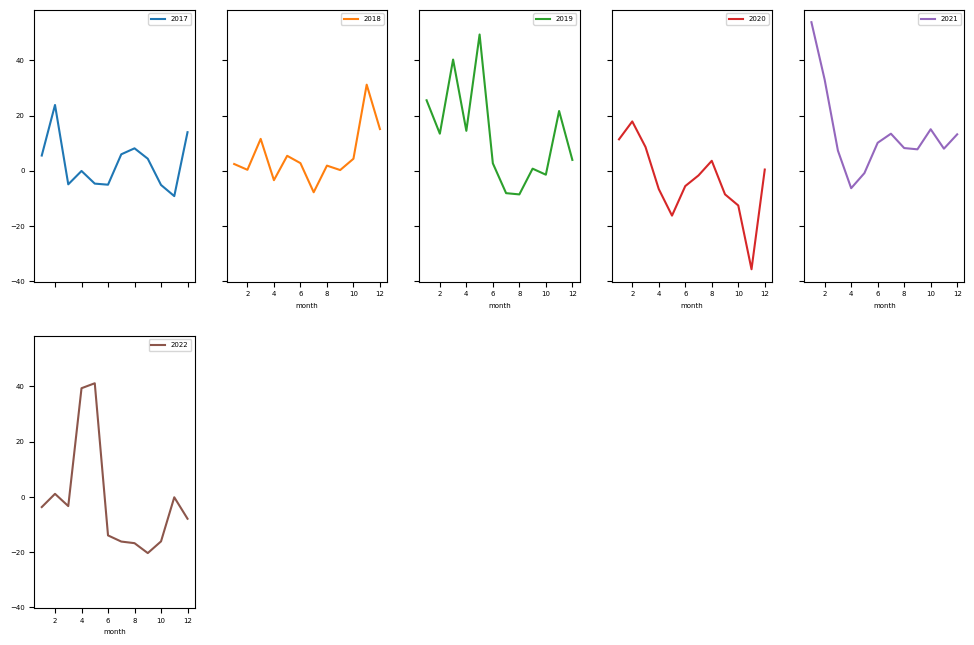

In [238]:
df = df_freq_D.copy()
pd.pivot_table(df.loc[df_freq_D['year'] != 2006], values="Delay",columns="year", index="month").plot(subplots=True, figsize=(12, 12), layout=(3, 5), sharey=True)

In [17]:
df = df_freq_M.copy()
df["weekday"] = (df["day_of_month"] < 5).astype(int)

Date_Time
2017-01-31    0
2017-02-28    0
2017-03-31    0
2017-04-30    0
2017-05-31    0
             ..
2022-08-31    0
2022-09-30    0
2022-10-31    0
2022-11-30    0
2022-12-31    0
Freq: M, Name: weekday, Length: 72, dtype: int32

### ***Autocorrelation Test***

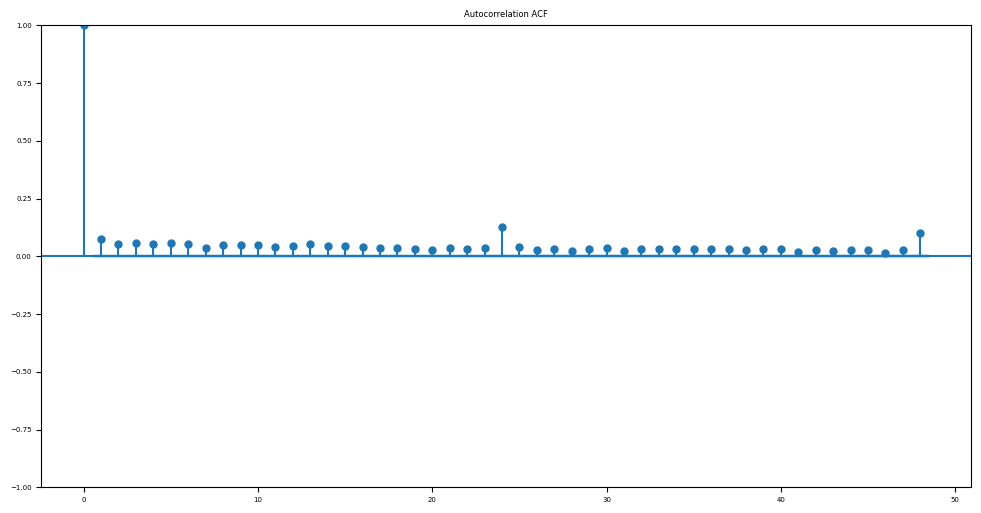

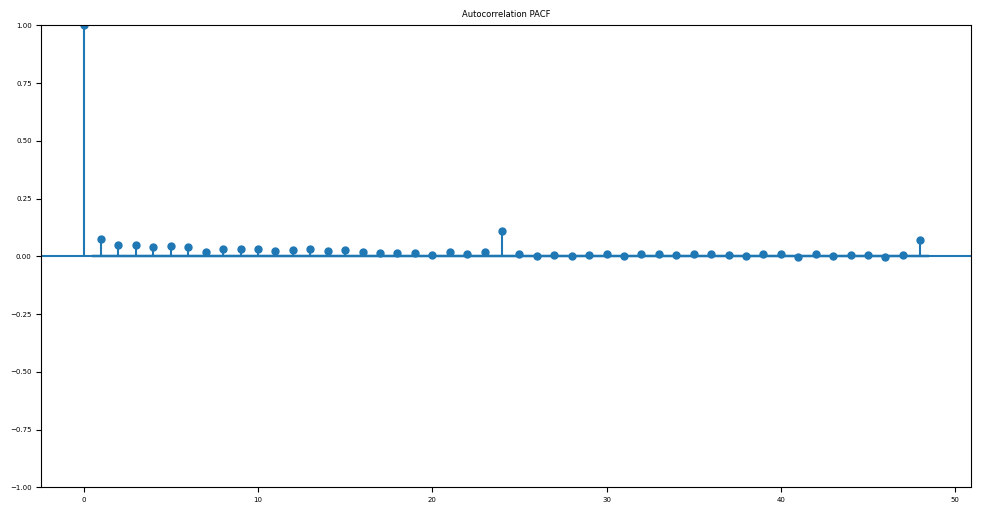

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


def plot_autocorrelation_test(df, numeric_col_name="Delay"):
    x = df[numeric_col_name]
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_acf(x, ax=ax)
    plt.title('Autocorrelation ACF')
    plt.show()
    x = df[numeric_col_name]
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_pacf(x, ax=ax)
    plt.title('Autocorrelation PACF')
    plt.show()

df = df_freq_H.copy()
plot_autocorrelation_test(df, numeric_col_name="Delay")

### ***Test Stationarity***

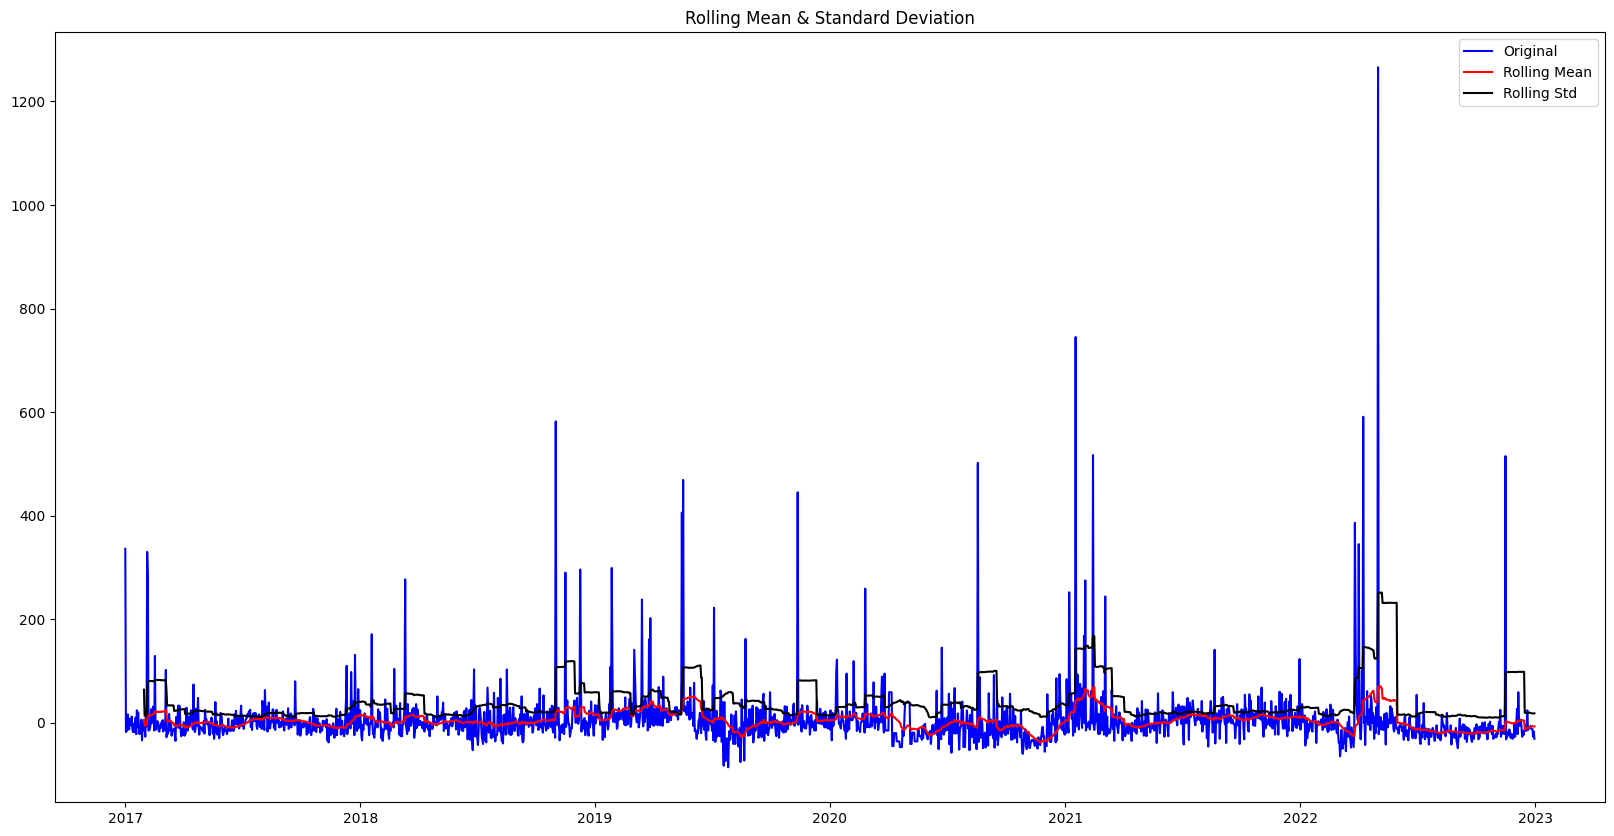


Test Statistic                -5.858214e+00
p-value                        3.459617e-07
#Lags Used                     2.600000e+01
Number of Observations Used    2.164000e+03
Critical Value (1%)           -3.433375e+00
Critical Value (5%)           -2.862877e+00
Critical Value (10%)          -2.567482e+00
dtype: float64


In [20]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    plt.figure(figsize=(20, 10))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    print('')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


df = df_freq_D.copy()
df2 = df.resample('D').mean()
test_stationarity(df2.Delay)

Dickey-Fuller test
Null Hypothesis (H0): It suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): It suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

### ***Adfuller Test***

In [23]:
from statsmodels.tsa.stattools import adfuller, kpss

def adfuller_test(df, numeric_col_name="Delay"):
    adf_result = adfuller(df[numeric_col_name])
    kpss_result = kpss(df[numeric_col_name])
    print(f'ADF p-value: {adf_result[1]}')
    print(f'KPSS p-value: {kpss_result[1]}')

df = df_freq_H.copy()
adfuller_test(df, "Delay")

ADF p-value: 0.0
KPSS p-value: 0.02353740812565401


### ***Seasonal-Trend decomposition***

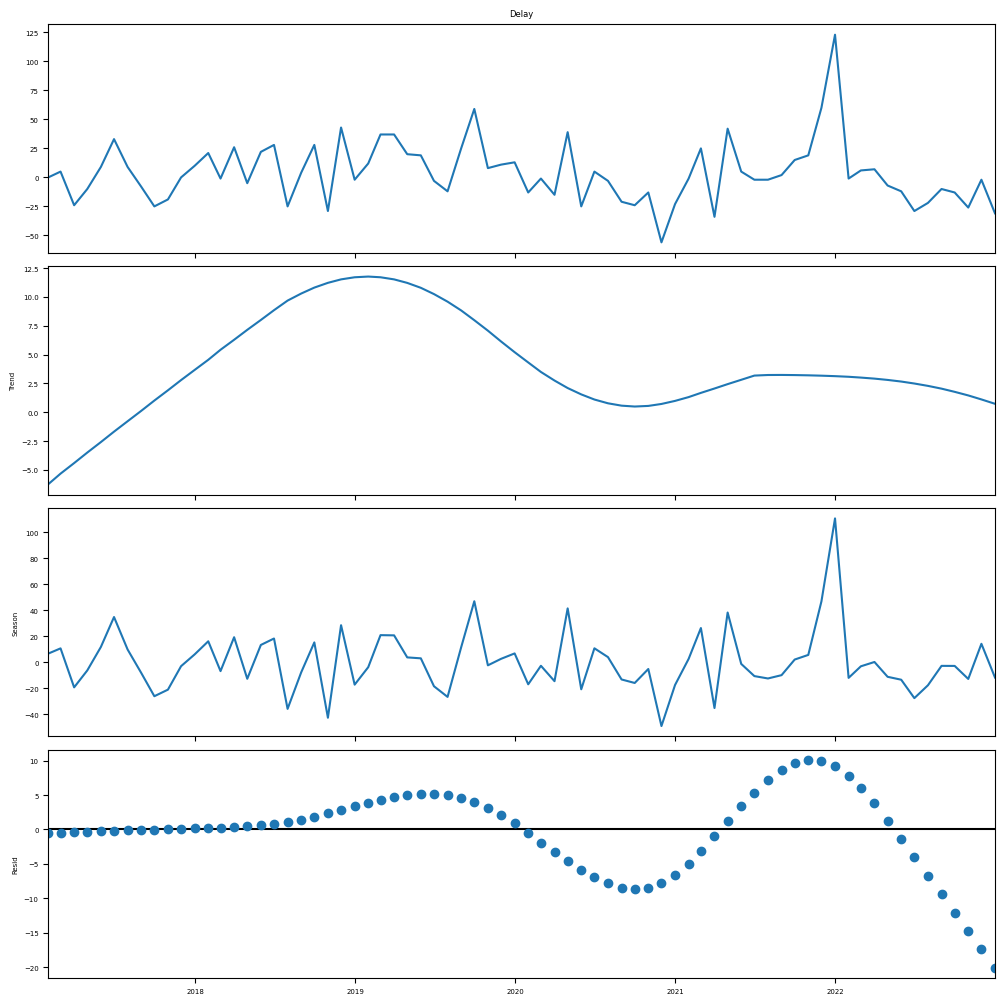

In [29]:
from statsmodels.tsa.seasonal import STL

def calc_plot_STL(df, numeric_col_name="Delay", period=12, seasonal=3):
    res = STL(
        endog=df[numeric_col_name],
        period=period,
        seasonal=seasonal,
        robust=True).fit()
    plt.rc("figure", figsize=(10, 10))
    plt.rc("font", size=5)
    res.plot()

df = df_freq_M.copy()
calc_plot_STL(df, numeric_col_name="Delay")

##### ***Additive Decomposition***

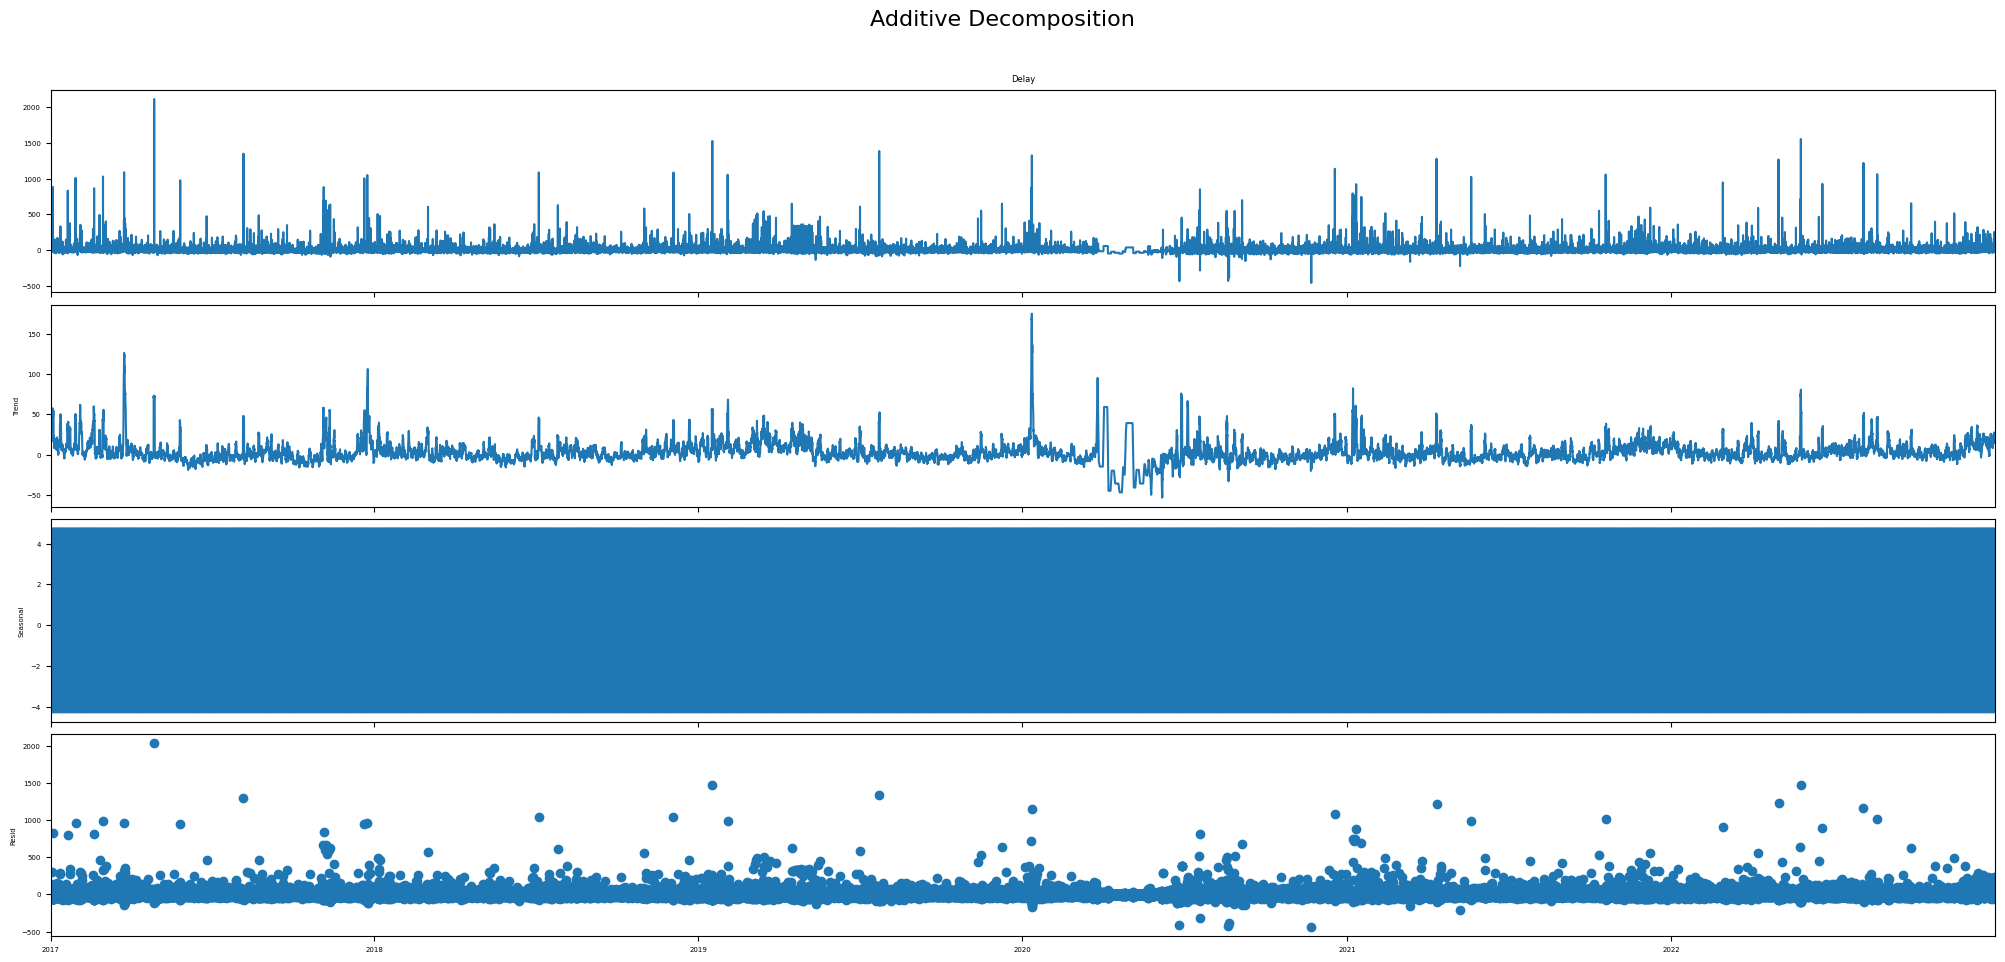

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose 


def plot_additivie_decomposition(df, numerical_col_name="Delay", period=12):
    additive_decomposition = seasonal_decompose(df[numerical_col_name], model='additive', period=period)
    additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

df = df_freq_H.copy()
plot_additivie_decomposition(df, numerical_col_name="Delay", period=30)

##### ***Seasonality / HFreq***

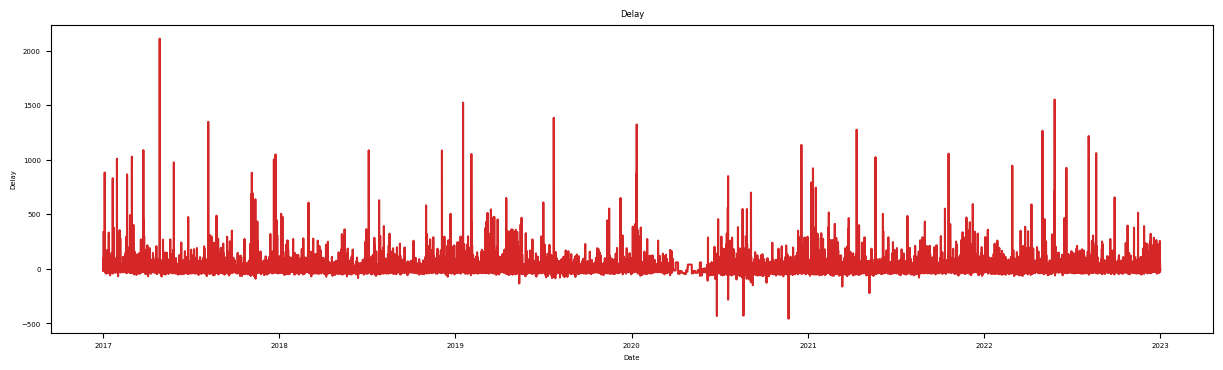

In [30]:
df = df_freq_H.copy()
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Delay', dpi=100):
    plt.figure(figsize=(15, 4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df['Delay'], title='Delay')

## ***Outliers***

##### ***Hour Resampling***

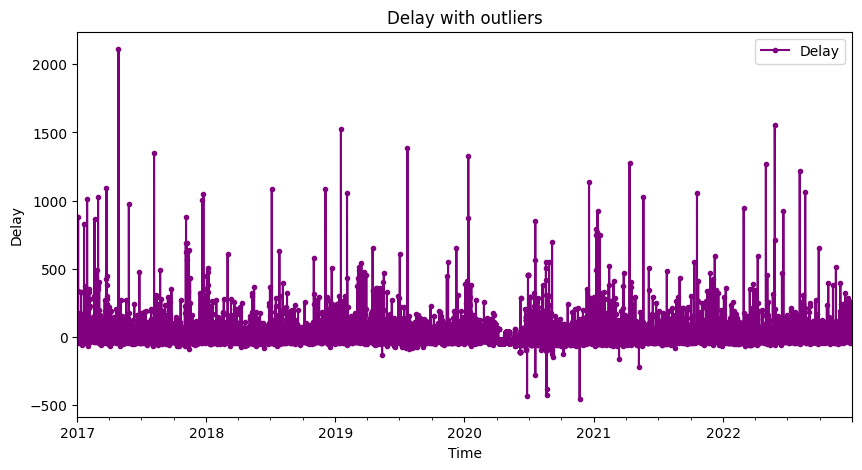

In [ ]:
df_H = df_freq_H.copy()
plot_delay_with_outliers(df_H, y_column='Delay', title='Delay with outliers', ylabel='Delay', xlabel='Time')

### ***STL***

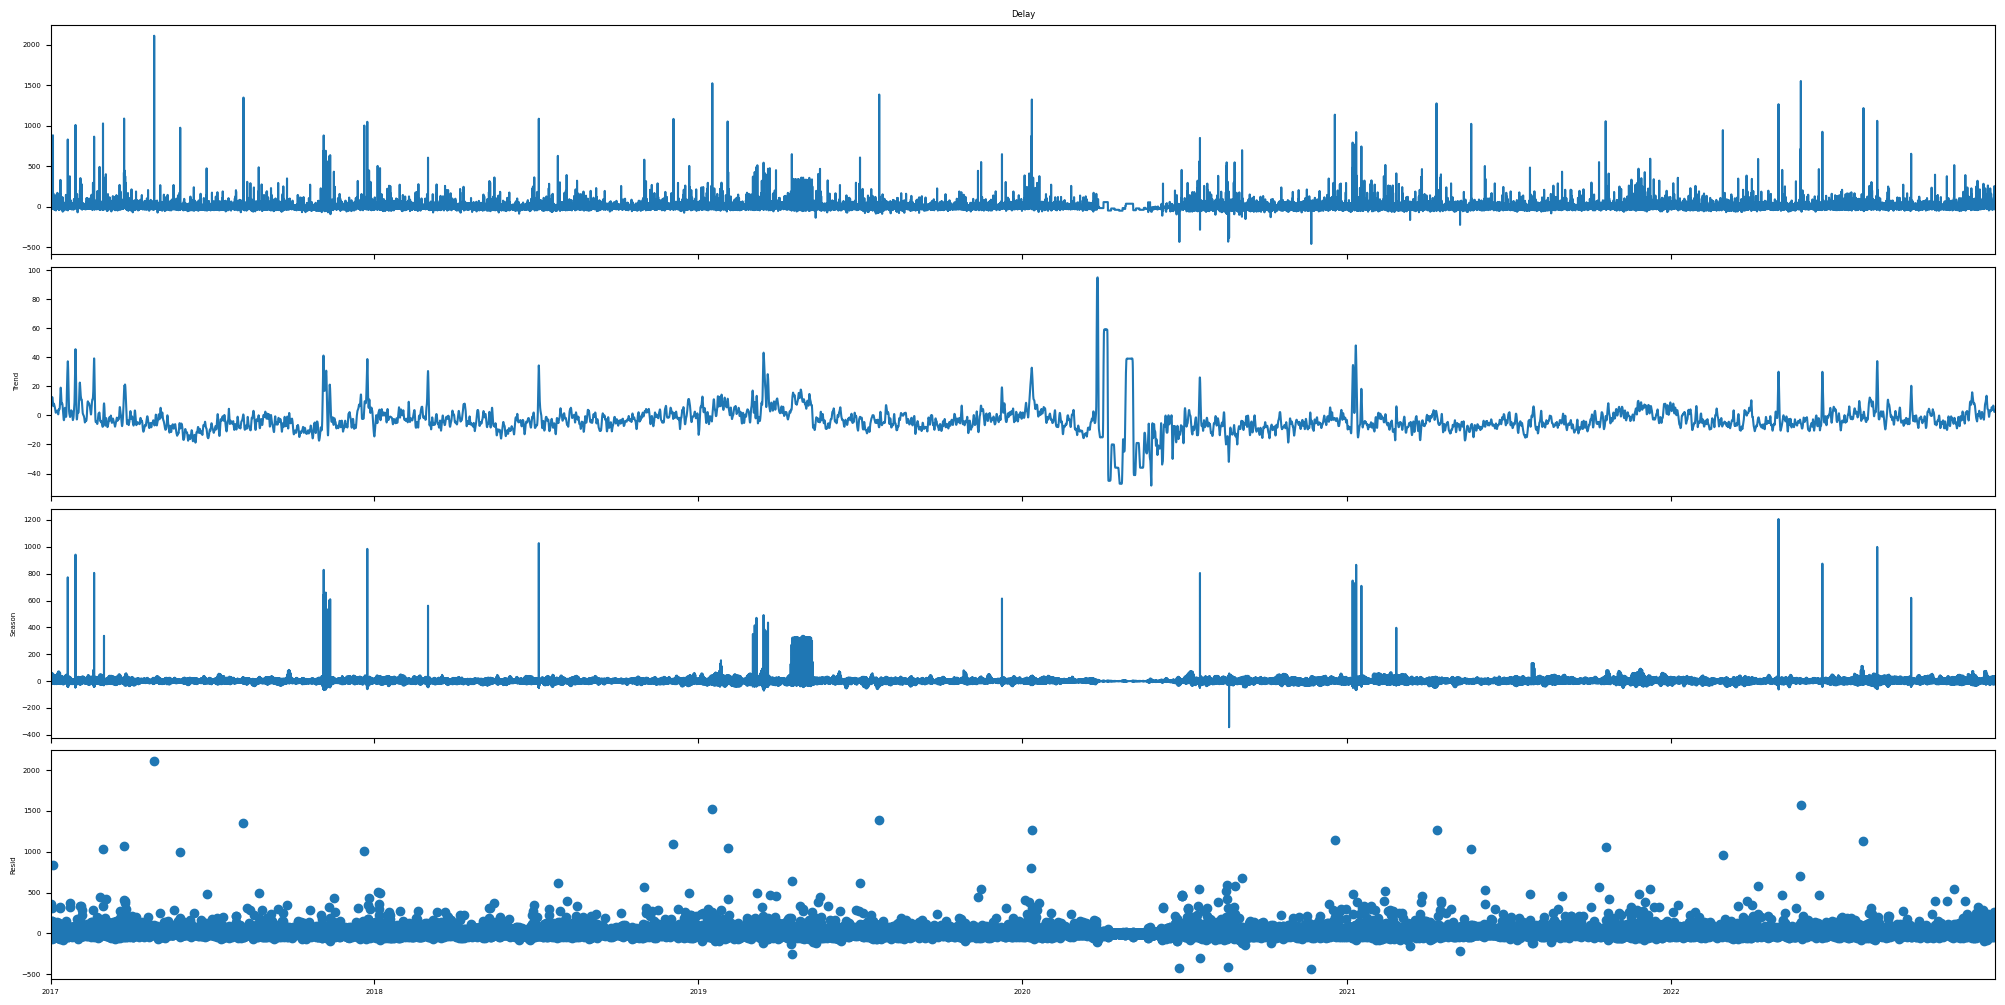

In [ ]:
from statsmodels.tsa.seasonal import STL

df_H = df_freq_H.copy()
endog_series = df_H["Delay"]
res = STL(endog_series, robust=True).fit()

plt.rc("figure", figsize=(20, 10))
plt.rc("font", size=5)
res.plot()
plt.show()

In [ ]:
def identify_outliers_STL(df, res, residual_col_name, factor=3, isOutlier_name="is_outlier", lower_bound_name="lower_bound", upper_bound_name="upper_bound"):
    df[residual_col_name] = res.resid
    Q1 = df[residual_col_name].quantile(0.25)
    Q3 = df[residual_col_name].quantile(0.75)
    IQR = Q3 - Q1
    df[lower_bound_name] = Q1 - factor * IQR
    df[upper_bound_name] = Q3 + factor * IQR
    df[isOutlier_name] = (df[residual_col_name] < (Q1 - factor * IQR)) | (
        df[residual_col_name] > (Q3 + factor * IQR))
    return df

factor = 10
identify_outliers_STL(df_H, res, "residual", factor, "is_outlier", "lower_bound", "upper_bound")
df_H

,Delay,residual,lower_bound,upper_bound,is_outlier
Date_Time,,,,,
2017-01-01 00:00:00,336,353.759731,-139.706808,141.917849,True
2017-01-01 01:00:00,-19,-3.936145,-139.706808,141.917849,False
2017-01-01 02:00:00,-14,-14.424726,-139.706808,141.917849,False
2017-01-01 03:00:00,-18,-17.983623,-139.706808,141.917849,False
2017-01-01 04:00:00,-12,-13.862997,-139.706808,141.917849,False
...,...,...,...,...,...
2022-12-31 18:00:00,-2,3.799029,-139.706808,141.917849,False
2022-12-31 19:00:00,-15,-32.994992,-139.706808,141.917849,False
2022-12-31 20:00:00,26,24.170181,-139.706808,141.917849,False


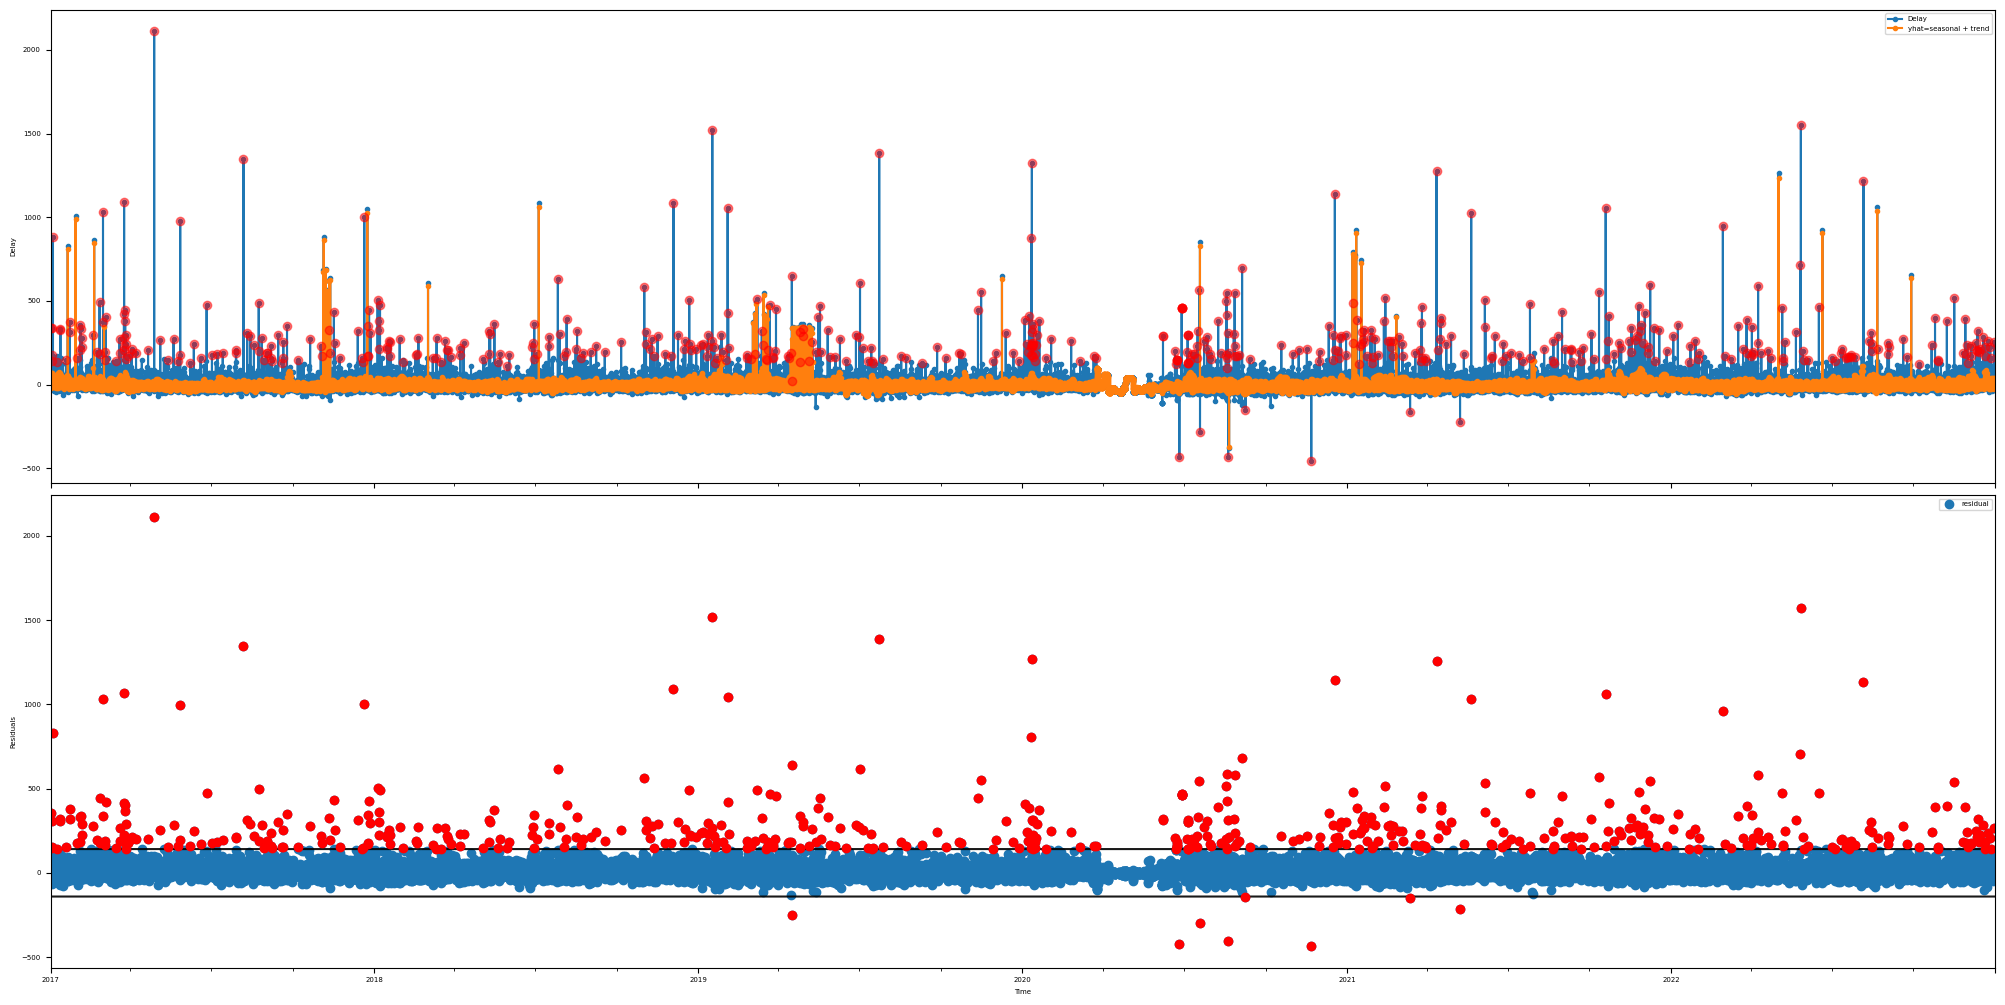

In [ ]:
def plot_detected_outliers_STL(df, yhat_col_name, numeric_col_name, residual_col_name, upper_col_name, lower_col_name, isOutlier_col_name):
    df[yhat_col_name] = res.seasonal + res.trend
    fig, ax = plt.subplots(nrows=2, figsize=[20, 10], sharex=True)
    df.plot(y=[numeric_col_name, yhat_col_name], marker=".", ax=ax[0])
    df[residual_col_name] = df[residual_col_name]
    df.plot(y=[residual_col_name], ax=ax[1], marker="o", linestyle="")
    df.plot(y=[upper_col_name, lower_col_name], ax=ax[1], color="k", legend=None, alpha=0.9)
    if df[isOutlier_col_name].any():
        df[numeric_col_name].loc[df[isOutlier_col_name]].plot(
            marker="o", color="r", ax=ax[0], legend=None, linestyle="", alpha=0.5)
        df[residual_col_name].loc[df[isOutlier_col_name]].plot(
            marker="o", color="r", ax=ax[1], legend=None, linestyle="")
    ax[0].set_ylabel(numeric_col_name)
    ax[1].set_ylabel("Residuals")
    ax[1].set_xlabel("Time")
    plt.tight_layout()


plot_detected_outliers_STL(df_H, yhat_col_name="yhat=seasonal + trend", numeric_col_name="Delay", residual_col_name="residual", upper_col_name="upper_bound", lower_col_name="lower_bound", isOutlier_col_name="is_outlier")

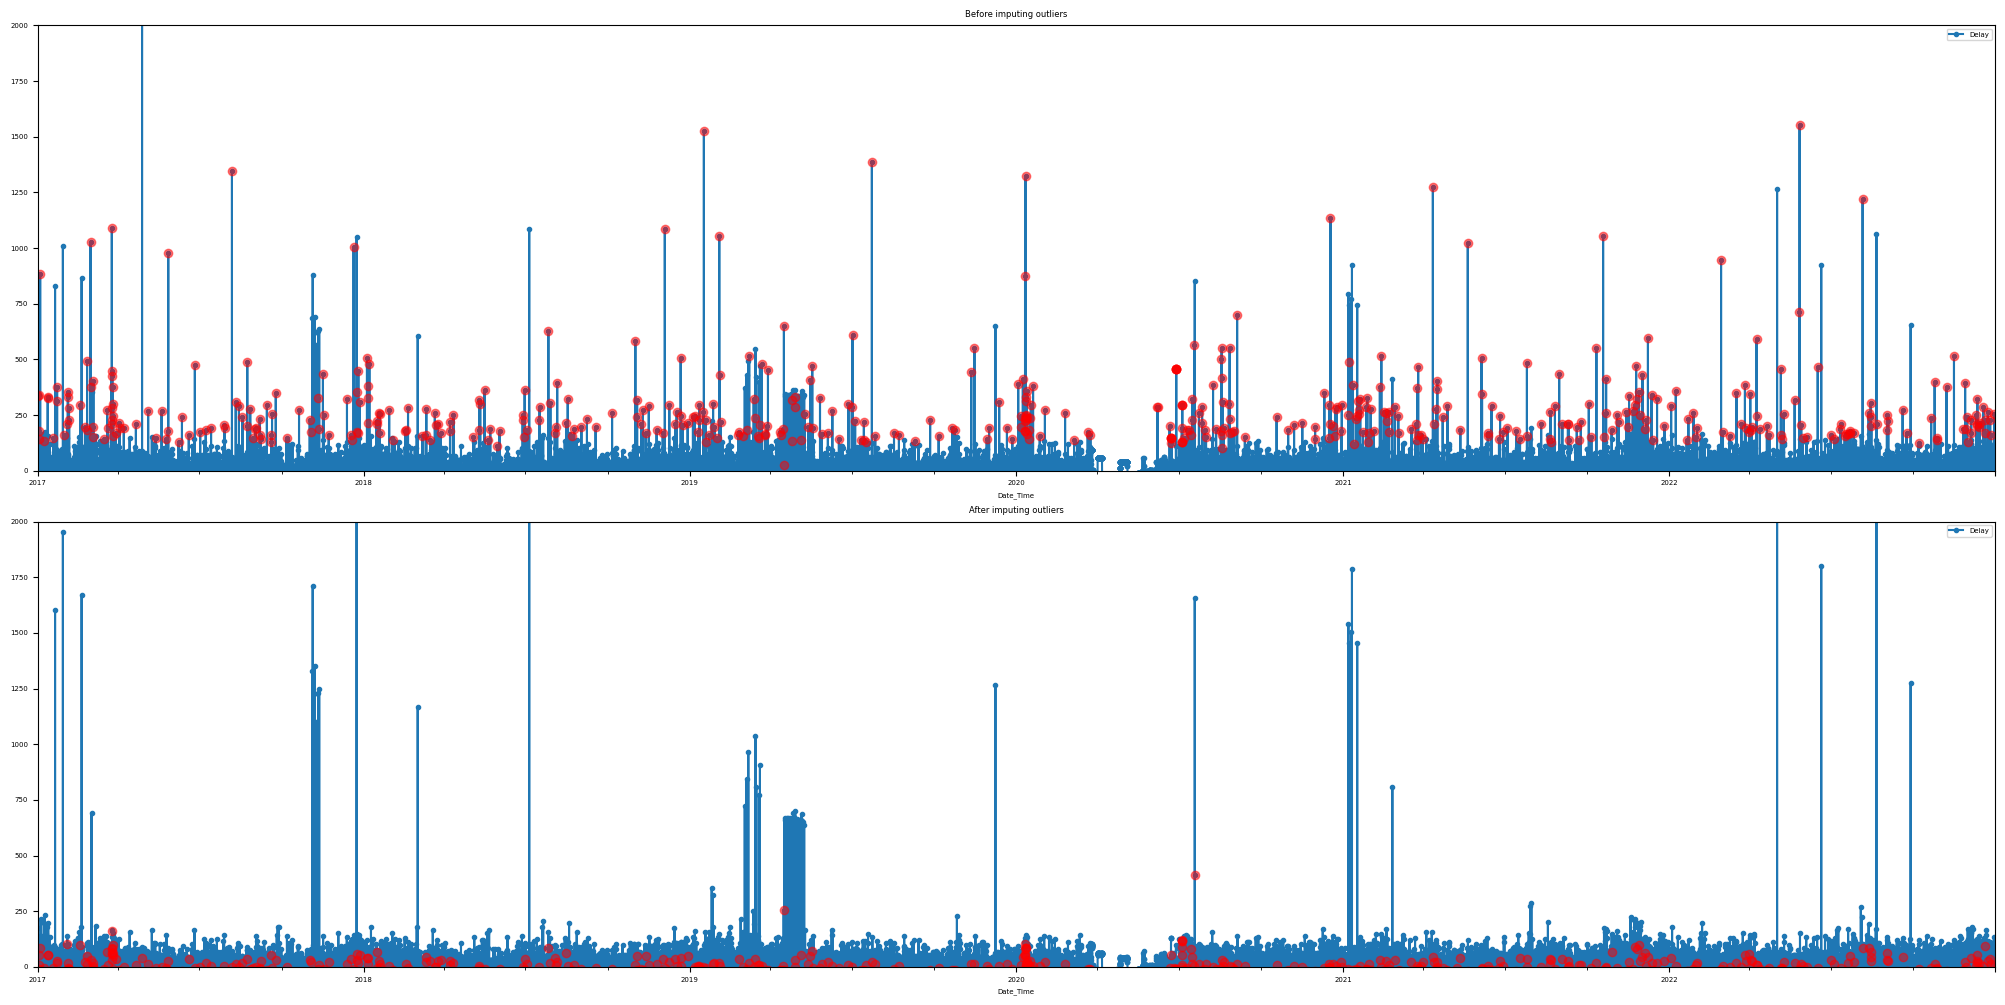

In [ ]:
def impute_outliers(df, isOutlier_name="is_outlier", numeric_col_name="Delay", imputation_method="linear"):
    df.loc[df[isOutlier_name], numeric_col_name] = np.NaN
    df.interpolate(method=imputation_method, inplace=True)
    df[numeric_col_name] = df[numeric_col_name] + res.seasonal


def plot_before_after_imputing_outliers(initial_df, imputed_df, numeric_col_name="Delay", isOutlier_name="is_outlier"):
    fig, ax = plt.subplots(nrows=2, figsize=[20, 10])
    initial_df.plot(y=numeric_col_name, marker=".", title="Before imputing outliers", ax=ax[0])
    initial_df[imputed_df[isOutlier_name]][numeric_col_name].plot(
        marker="o", color="r", ax=ax[0], legend=None, linestyle="", alpha=0.5)
    imputed_df.plot(y=[numeric_col_name], marker=".", title="After imputing outliers", ax=ax[1])
    imputed_df[imputed_df[isOutlier_name]][numeric_col_name].plot(
        marker="o", color="r", ax=ax[1], legend=None, linestyle="", alpha=0.5)
    ax[0].set_ylim([0, 2000])
    ax[1].set_ylim([0, 2000])
    plt.tight_layout()


impute_outliers(df_H, isOutlier_name="is_outlier", numeric_col_name="Delay", imputation_method="linear")
plot_before_after_imputing_outliers(df_freq_H, df_H, numeric_col_name="Delay", isOutlier_name="is_outlier")

### *****Deseasonality*****

In [ ]:
from statsmodels.tsa.seasonal import STL

df_H = df_freq_H.copy()
res = STL(df_H['Delay'], robust=True).fit()
seasonal_component = res.seasonal
seasonal_component.head()

Date_Time
2017-01-01 00:00:00   -22.275139
2017-01-01 01:00:00   -19.630175
2017-01-01 02:00:00    -4.192648
2017-01-01 03:00:00    -4.684762
2017-01-01 04:00:00    -2.856392
Freq: H, Name: season, dtype: float64

In [ ]:
df_deseasoned = (df_H['Delay'] - seasonal_component).to_frame('Delay')
df_deseasoned.head()

,Delay
Date_Time,
2017-01-01 00:00:00,358.275139
2017-01-01 01:00:00,0.630175
2017-01-01 02:00:00,-9.807352
2017-01-01 03:00:00,-13.315238
2017-01-01 04:00:00,-9.143608


Text(0, 0.5, 'Delay deseasonalised')

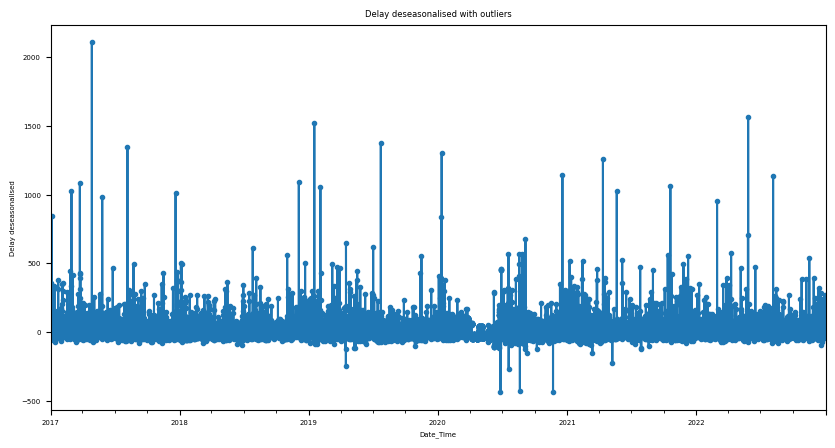

In [ ]:
fig, ax = plt.subplots(figsize=[10,5])
df_deseasoned.plot(y='Delay', marker='.', figsize=[10,5], legend=None, ax=ax)

ax.set_title("Delay deseasonalised with outliers")
ax.set_ylabel("Delay deseasonalised")

### ***LOWESS***

In [ ]:
df_ = df_deseasoned.copy()

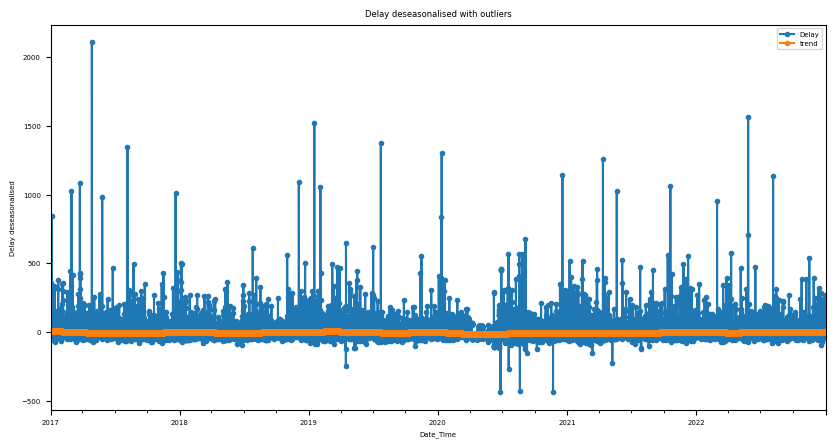

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess


def plot_delay_deseasonalised_with_outliers(df, numeric_col_name="Delay", trend_col_name="trend"):
    y = df[numeric_col_name].values
    x = np.arange(0, len(y), 1)
    trend = lowess(y, x, frac=0.1)
    df[trend_col_name] = trend[:, 1]
    ax = df.plot(y=[numeric_col_name, trend_col_name], marker=".", figsize=[10, 5])
    ax.set_title(numeric_col_name+" deseasonalised with outliers")
    ax.set_ylabel(numeric_col_name+" deseasonalised")

plot_delay_deseasonalised_with_outliers(
    df_, numeric_col_name="Delay", trend_col_name="trend")


In [ ]:
def compute_residuals(df, factor, residual_col_name="residual", numeric_col_name="Delay", trend_col_name="trend", lower_col_name="lower_bound", upper_col_name="upper_bound", isOutlier_col_name="is_outlier"):
    df[residual_col_name] = df[numeric_col_name] - df[trend_col_name]
    Q1 = df[residual_col_name].quantile(0.25)
    Q3 = df[residual_col_name].quantile(0.75)
    IQR = Q3 - Q1
    df[lower_col_name] = Q1 - factor * IQR
    df[upper_col_name] = Q3 + factor * IQR
    df[isOutlier_col_name] = (df[residual_col_name] < df[lower_col_name]) | (
        df[residual_col_name] > df[upper_col_name]
    )

compute_residuals(df_, factor=10, residual_col_name="residual", numeric_col_name="Delay", trend_col_name="trend",
                  lower_col_name="lower_bound", upper_col_name="upper_bound", isOutlier_col_name="is_outlier")
df_

,Delay,trend,residual,lower_bound,upper_bound,is_outlier
Date_Time,,,,,,
2017-01-01 00:00:00,358.275139,7.078581,351.196558,-176.600962,179.376125,True
2017-01-01 01:00:00,0.630175,7.074135,-6.443959,-176.600962,179.376125,False
2017-01-01 02:00:00,-9.807352,7.069688,-16.877040,-176.600962,179.376125,False
2017-01-01 03:00:00,-13.315238,7.065242,-20.380480,-176.600962,179.376125,False
2017-01-01 04:00:00,-9.143608,7.060796,-16.204404,-176.600962,179.376125,False
...,...,...,...,...,...,...
2022-12-31 18:00:00,6.257547,0.525817,5.731729,-176.600962,179.376125,False
2022-12-31 19:00:00,-30.544989,0.526629,-31.071618,-176.600962,179.376125,False
2022-12-31 20:00:00,26.613155,0.527441,26.085714,-176.600962,179.376125,False


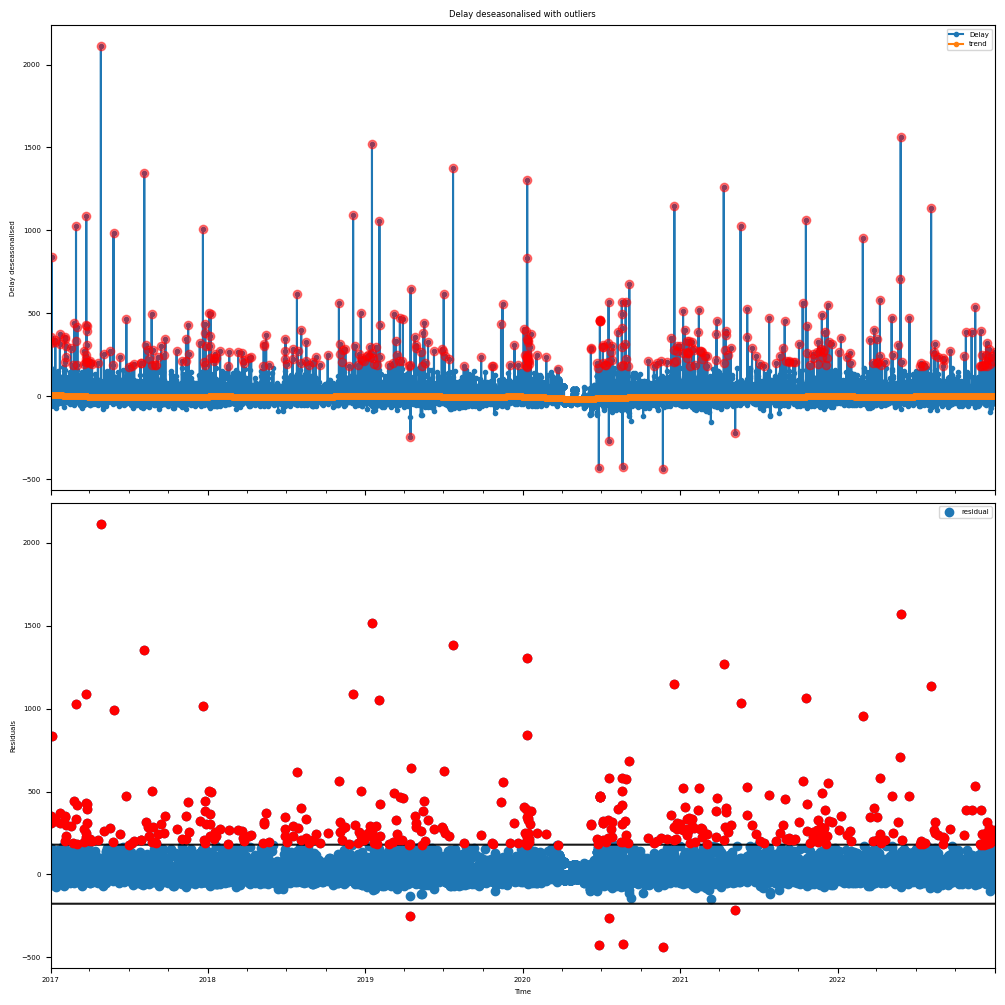

In [ ]:
def plot_detected_outliers_LOWESS(df, numeric_col_name="Delay", trend_col_name="trend", residual_col_name="residual", upper_col_name="upper_bound", lower_col_name="lower_bound", isOutlier_col_name="is_outlier"):
    fig, ax = plt.subplots(nrows=2, figsize=[10, 10], sharex=True)
    df.plot(y=[numeric_col_name, trend_col_name], marker=".", ax=ax[0])
    df[residual_col_name] = df[residual_col_name] 
    df.plot(y=[residual_col_name], ax=ax[1], marker="o", linestyle="")
    df.plot(y=[upper_col_name, lower_col_name], ax=ax[1],
            color="k", legend=None, alpha=0.9)
    if df[isOutlier_col_name].any():
        df[numeric_col_name].loc[df[isOutlier_col_name]].plot(
            marker="o", color="r", ax=ax[0], legend=None, linestyle="", alpha=0.5)
        df[residual_col_name].loc[df[isOutlier_col_name]].plot(
            marker="o", color="r", ax=ax[1], legend=None, linestyle="")
    ax[0].set_title(numeric_col_name+" deseasonalised with outliers")
    ax[0].set_ylabel(numeric_col_name+" deseasonalised")
    ax[1].set_ylabel("Residuals")
    ax[1].set_xlabel("Time")
    plt.tight_layout()


plot_detected_outliers_LOWESS(df_, numeric_col_name="Delay", trend_col_name="trend", residual_col_name="residual",
                              upper_col_name="upper_bound", lower_col_name="lower_bound", isOutlier_col_name="is_outlier")


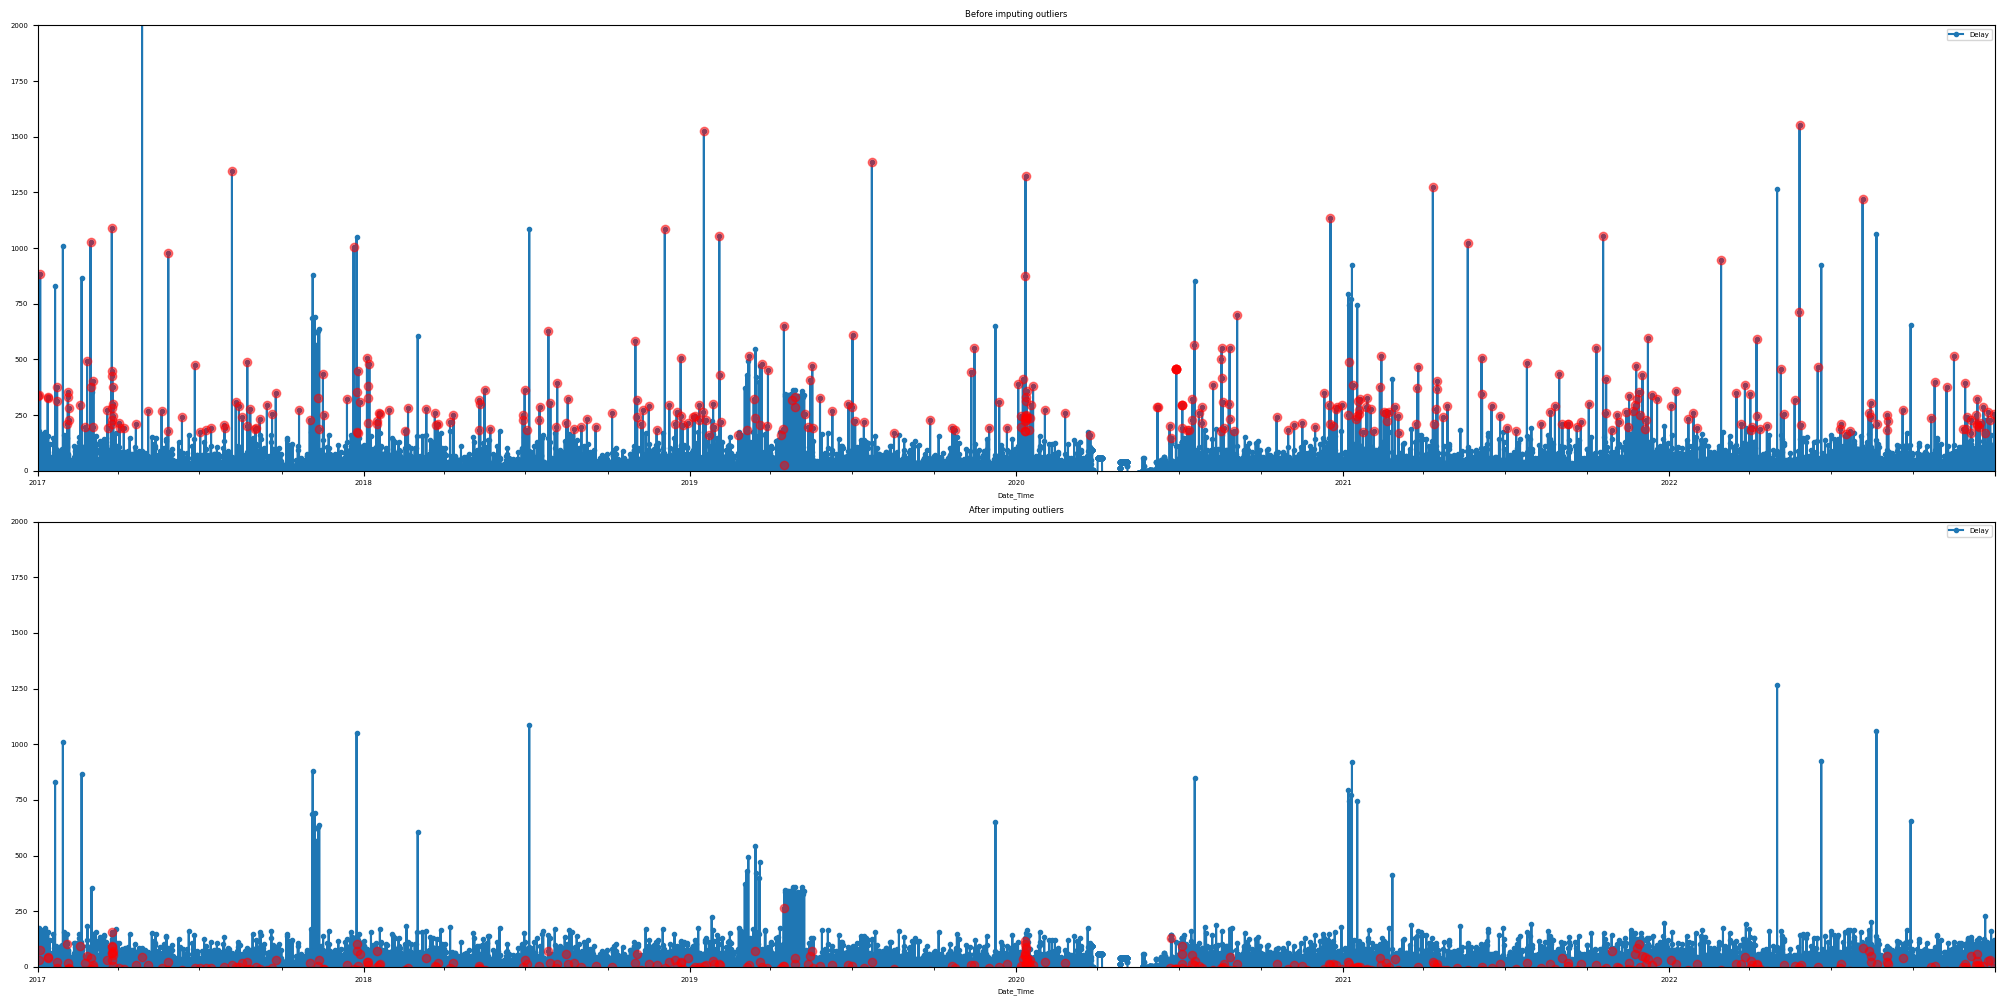

In [ ]:
impute_outliers(df_, isOutlier_name="is_outlier",numeric_col_name="Delay", imputation_method="linear")
plot_before_after_imputing_outliers(df_H, df_, numeric_col_name="Delay", isOutlier_name="is_outlier")


### ***Rolling Mean***

***Reminder: Re-Run Deseasonality cell***

In [ ]:
df_ = df_deseasoned.copy()

In [ ]:
def detect_outliers_rolling_method(df, numeric_col_name="Delay", factor=3, method="rolling_mean", metric="mean", rolling_std="rolling_std", std="std", isOutlier_col_name="is_outlier"):
    df_rolling_stats = (
        df[numeric_col_name]
        .rolling(
            window=13, 
            center=True, 
            min_periods=1)  # Min periods set to 1 so that edge cases also have estimates
        .agg({method: metric, rolling_std: std}))
    df[[method, rolling_std]] = df_rolling_stats
    df[isOutlier_col_name] = np.abs(
        df[numeric_col_name] - df[method]) > factor * df[rolling_std]


detect_outliers_rolling_method(df_, numeric_col_name="Delay", factor=3.1, method="rolling_mean",
                             metric="mean", rolling_std="rolling_std", std="std", isOutlier_col_name="is_outlier")
df_.head()

,Delay,rolling_mean,rolling_std,is_outlier
Date_Time,,,,
2017-01-01 00:00:00,358.275139,56.488211,134.852531,False
2017-01-01 01:00:00,0.630175,49.857285,126.250038,False
2017-01-01 02:00:00,-9.807352,44.045326,119.376287,False
2017-01-01 03:00:00,-13.315238,39.949732,113.291773,False
2017-01-01 04:00:00,-9.143608,40.926138,107.526789,False


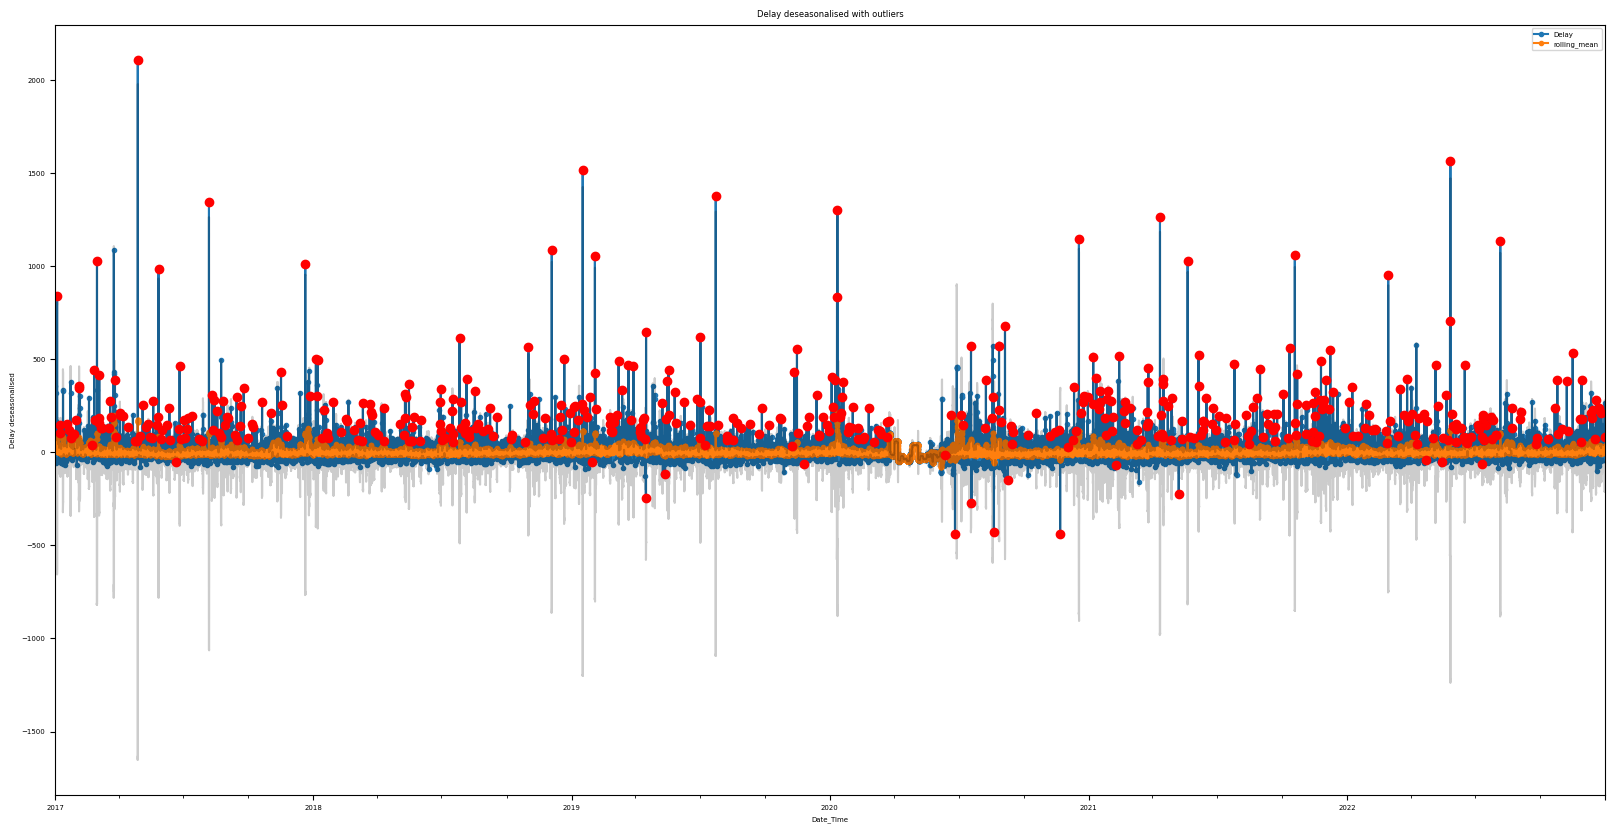

In [ ]:
def plot_detected_outliers_rolling_method(numeric_col_name="Delay", upper_col_name="upper", lower_col_name="lower", isOutlier_col_name="is_outlier", method="rolling_mean", std="rolling_std"):
    df_[upper_col_name] = df_[method] + factor * df_[std]
    df_[lower_col_name] = df_[method] - factor * df_[std]
    fig, ax = plt.subplots(figsize=[10, 5])
    df_.plot(y=[numeric_col_name, method], marker=".", ax=ax)
    df_.plot(y=[upper_col_name, lower_col_name], figsize=[20, 10], ax=ax, color="k", alpha=0.2, legend=None)
    if df_[isOutlier_col_name].any():
        df_[numeric_col_name].loc[df_[isOutlier_col_name]].plot(
            marker="o", color="r", ax=ax, legend=None, linestyle="")
    ax.set_title(numeric_col_name + " deseasonalised with outliers")
    ax.set_ylabel(numeric_col_name + " deseasonalised")


plot_detected_outliers_rolling_method(numeric_col_name="Delay", upper_col_name="upper",lower_col_name="lower", isOutlier_col_name="is_outlier", method="rolling_mean", std="rolling_std")


### ***Rolling Median***

***Reminder: Re-Run Deseasonality cell***

In [ ]:
df_ = df_deseasoned.copy()

In [ ]:
def median_absolute_deviation(y):
    return np.median(np.abs(y - np.median(y)))

In [ ]:
detect_outliers_rolling_method(df_, numeric_col_name="Delay", factor=13, method="rolling_median", metric="median", rolling_std="rolling_MAD", std=median_absolute_deviation, isOutlier_col_name="is_outlier")

df_.head()
print(f"{(df_['is_outlier'] == True).sum()} outliers found.")

1112 outliers found.


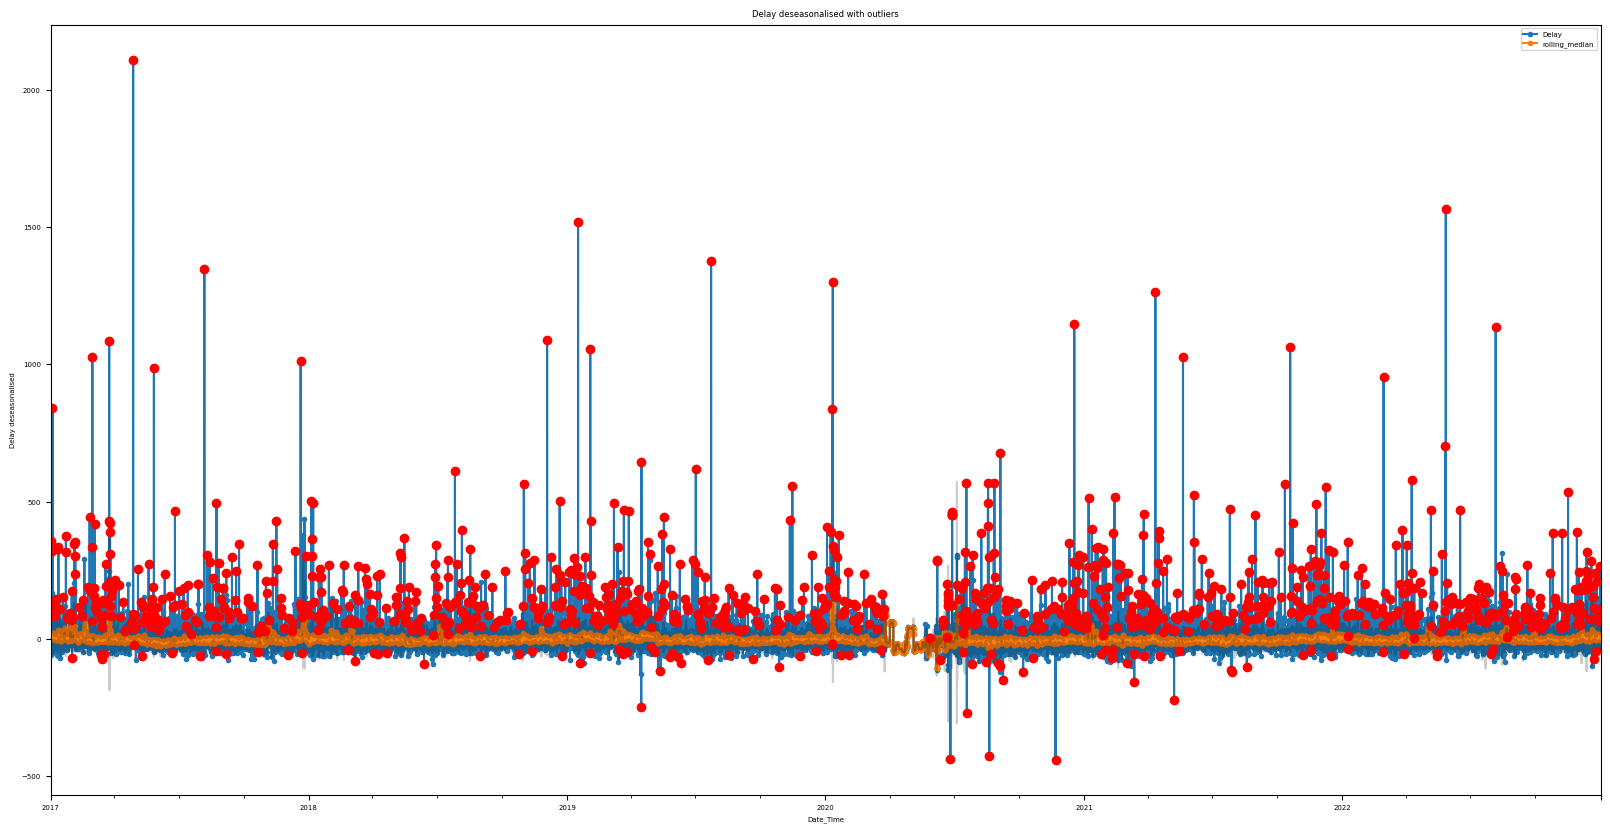

In [ ]:
plot_detected_outliers_rolling_method(numeric_col_name="Delay", upper_col_name="upper", lower_col_name="lower",
                                    isOutlier_col_name="is_outlier", method="rolling_median", std="rolling_MAD")